# Starbucks Capstone Challenge
## Focus: Predicting effective offers using app user data
### By: Michael Bong

## Table of contents

### [0: Overview of dataset](#0) 
* [0.01: Introduction](#0.01)
* [0.02: Example](#0.02)
* [0.03: Cleaning](#0.03)
* [0.04: Final advice](#0.04)

### [1: Data Sets explained](#1)

### [2: Project overview](#2)
* [2.01: Aim](#2.01)
* [2.02: Business questions](#2.02)
* [2.03: Skeleton of the plan](#2.03)

### [3: Import packages](#3)

### [4: Import and explore datasets](#4)
* [4.01: Portfolio dataset](#4.01)
* [4.02: Profile dataset](#4.02)
* [4.03: Transcript dataset](#4.03)

### [5: Data pre-processing](#5)
* [5.01: Assigning offer_id to each transaction - where applicable](#5.01)
	* [5.01.1: Explore the data](#5.01.1)
	* [5.01.2: Identify 'offer_start_time' for each 'offer viewed' based on associated 'offer received'](#5.01.2)
	* [5.01.3: Identify 'offer_start_time' for each 'offer completed' based on associated 'offer received'](#5.01.3)
	* [5.01.4: Re-assign 'offer_id' for each 'transaction' event that is followed by an 'offer_completed' event](#5.01.4)
	* [5.01.5: Assign an 'offer_id', 'offer_start_time' to each 'transaction' event if there a preceding 'offer received' event](#5.01.5)
* [5.02: Modify the offer duration (days) in the 'portfolio' data set to (hours)](#5.02)
* [5.03: Modify the 'portfolio' data set to cater for independent transactions](#5.03)
* [5.04: Replace the offer id of independent transactions in the 'Transcript' data set with '0000'](#5.04)
* [5.05: Replace the Null offer start time of independent transactions in the 'Transcript' data set with event time](#5.05)
* [5.06: Merge the cleaned 'Portfolio', 'Profile', 'Transcript' data sets](#5.06)
	* [5.06.1: Reset the 'transcript' data set to include only required fields](#5.06.1)
	* [5.06.2: Reset the 'portfolio' data set to include only required fields](#5.06.2)
	* [5.06.3: Reset the 'profile' data set to include only required fields](#5.06.3)
	* [5.06.4: Merge the 3 data sets](#5.06.4)
	* [5.06.5: Remove records with Null values in merged set](#5.06.5)
* [5.07: Calculate offer end time and flag if events ocurred within each offer time frame](#5.07)
* [5.08: Determine the events for each customer, offer - to see if it the offer influenced the events](#5.08)
* [5.09: Categorize each customer, offer interaction into - effective offer, ineffective offer](#5.09)
* [5.10: Split out categorical fields (offer_type, gender)](#5.10)
* [5.11: Generate distinct offer counts by type for each customer](#5.11)
* [5.12: Finalise creation of merged data set for use in models and analysis - overall and by offer type](#5.12)

### [6: Model implementation](#6)
* [6.01: Prepare model implementation pipeline functions](#6.01)
* [6.02: Run and optimise models for each offer type](#6.02)
	* [6.02.1: Modelling for 'informational' offer](#6.02.1)
	* [6.02.2: Modelling for 'bogo' offer](#6.02.2)
	* [6.02.3: Modelling for 'discount' offer](#6.02.3)
	* [6.02.4: Modelling for 'none' offer](#6.02.4)
	* [6.02.5: Modelling for 'overall' offer](#6.02.5)
	* [6.02.6: Analyse accuracy of optimised models](#6.02.6)
* [6.03: Feature importance for each optimised model](#6.03)
	* [6.03.1: Feature importance - 'informational' offer model](#6.03.1)
	* [6.03.2: Feature importance - 'bogo' offer model](#6.03.2)
	* [6.03.3: Feature importance - 'discount' offer model](#6.03.3)
	* [6.03.4: Feature importance - 'overall' offer model](#6.03.4)
    
### [7: Conclusion](#7)
* [7.01: Reflection - Answering the business questions](#7.01)
* [7.02: Potential future improvements](#7.02)    

<a id='0' ></a>
# 0: Overview of dataset
<a id='0.01' ></a>
## 0.01: Introduction

This data set contains simulated **data that mimics customer behavior on the Starbucks rewards mobile app**. Once every few days, **Starbucks sends out an offer to users of the mobile app**. An offer can be merely an **advertisement for a drink** or an actual **offer such as a discount or BOGO (buy one get one free)**. Some **users might not receive any offer** during certain weeks. 

**Not all users receive the same offer**, and that is the challenge to solve with this data set.

**Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type**. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

**Every offer has a validity period before the offer expires**. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that **informational offers have a validity period even though these ads are merely providing information about a product**; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given **transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase**. This transactional data also **has a record for each offer that a user receives** as well as a record for **when a user actually views the offer**. There are also records for **when a user completes an offer**. 

Keep in mind as well that someone using the app **might make a purchase through the app without having received an offer or seen an offer**.

<a id='0.02' ></a>
## 0.02: Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. **Customers do not opt into the offers that they receive**; in other words, a **user can receive an offer, never actually view the offer, and still complete the offer**. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There **will be an offer completion record in the data set**; however, the **customer was not influenced by the offer because the customer never viewed the offer**.

<a id='0.03' ></a>
## 0.03: Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. **You'll want to try to assess what a certain demographic group will buy when not receiving any offers**.

<a id='0.04' ></a>
## 0.04: Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could **build a machine learning model that predicts how much someone will spend based on demographics and offer type**. Or you could **build a model that predicts whether or not someone will respond to an offer**. Or, you don't need to build a machine learning model at all. You could **develop a set of heuristics that determine what offer you should send to each customer** (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

<a id='1' ></a>
# 1: Data Sets explained

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

<a id='2' ></a>
# 2: Project overview
<a id='2.01' ></a>
## 2.01: Aim
In this project, we are aiming to predict effective offers to be provided to app users. Depending on the characteristics of an app user, they will be provided with a discount, or BOGO, or informational offer. Ideally, we want to provide app users with the type of offer they are most likely to act on/respond to - ie. an 'effective offer'.

<a id='2.02' ></a>
## 2.02: Business questions
In order to guide the project, we focus on the following business questions:
1. For each type of offer, what features (offer characteristics, user characteristics) increases its effectiveness?
2. For each type of offer, can we predict the likelihood of an app user responding to the offer?
    > This enables us to target users with an offer they are most likely to respond to.

<a id='2.03' ></a>
## 2.03: Skeleton of the plan
A quick roadmap for the project:
- Import packages
- Explore the 3 datasets
 - portfolio data
 - profile data
 - transcript data
- Preprocess the datasets
- Engineer useful features
- Combine the datasets
- Implement models
- Choose best model
- Highlight important features
- Reflect on findings and potential future improvements

<a id='3' ></a>
# 3: Import packages

In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from time import time
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
% matplotlib inline


<a id='4' ></a>
# 4: Import and explore datasets

We will be exploring all 3 datasets:
- 4.1: portfolio
- 4.2: profile
- 4.3: transcript

Key steps taken here:
- Importing the datasets
- Create a generic meta data report for each dataset
- Explore certain fields in more detail
- Clean each dataset
- Generate new fields from existing fields

In [2]:
# Importing the datasets
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
# Create function to explore datasets

def explore_data(df, n_unique_value=20):
    '''
    input:
    - df: data frame to explore
    - n_unique_value: number of unique values to present in report
    
    outputs:
    - report containing meta data on input data frame
    '''
    
    print('#' * 100)
    print('#' * 100)
          
    print('Meta data report for dataset')
    
    print('#' * 100)
    print('#' * 100)
    print(' ' * 1) 
    
    # Shape of data
    print('Number of rows/records: {}'.format(df.shape[0]))
    print('Number of columns/fields: {}'.format(df.shape[1]))

    print('-' * 100)
    print(' ' * 1)

    # Column names
    print('Column names:')
    print(list(df.columns))

    print('-' * 100)
    print(' ' * 1)

    # Data types for each column
    print('Data types per column:')
    print(df.dtypes)

    print('-' * 100)
    print(' ' * 1)    
    
    # Number of unique values for each column
    print('Uniques values per Column:')
    print(df.astype(str).nunique())

    print('-' * 100)
    print(' ' * 1)

    # Top 20 unique values for each column 
    for i in list(df.columns):
        print('Column name: {}'.format(i))
        print('-' * 50)
        unique_list = list(df[i].astype(str).unique())
        print('Top {} unique values: '.format(n_unique_value))
        print(unique_list[:n_unique_value])
        print('-' * 100)
        print(' ' * 1)

    # Number of null values for each column
    print('Null values per Column:')
    print(df.isnull().sum())

    print('-' * 100)
    print(' ' * 1)

    # Peek of data
    print('Quick view of top 10 records:')
    print(df.head(10))

<a id='4.01' ></a>
## 4.01: Portfolio data

**Source:**
- portfolio.json

**Contains:**
- offer ids and meta data about each offer (duration, type, etc.)

**Fields:**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
    > - BOGO offer: Buy One, Get One free
    > - Discount offer: Discount with purchase
    > - Informational offer: Provides product information, without price discount or free products
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

---------------------------------------------------------------------------------------------------------------------

**Key callouts from report below:**
- There are no null values
- Rename 'difficulty' to 'offer_difficulty'
- Rename 'duration' to 'offer_duration'
- Rename 'reward' to 'offer_reward'
- 'channels' column should be broken into 'channel_email', 'channel_mobile', 'channel_social', 'channel_web' 
    > Create expanded columns
    > Drop original column
- 'offer_type' column should be broken into 'offer_bogo', 'offer_informational', 'offer_discount'
    > Create expanded columns
    > Drop original column
- 'portfolio.id' is equivalent to 'transcript.value[offer_id]'
    > Rename 'portfolio.id' to 'portfolio.offer_id'

In [4]:
# Generate meta data report for Portfolio dataset
explore_data(portfolio, n_unique_value=20)

####################################################################################################
####################################################################################################
Meta data report for dataset
####################################################################################################
####################################################################################################
 
Number of rows/records: 10
Number of columns/fields: 6
----------------------------------------------------------------------------------------------------
 
Column names:
['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward']
----------------------------------------------------------------------------------------------------
 
Data types per column:
channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object
----------------------------------------------------------

In [5]:
# Create copy of dataset
portfolio_clean = portfolio

In [6]:
# Create function to drop columns

def drop_cols(df, drop_cols, inplace=False):
    '''
    inputs:
    - df: dataframe from which column should be dropped
    - drop_cols: list or string of column name to be dropped
    - inplace: specify whether columns are dropped in place or not
    
    outputs:
    - Returns dataframe with dropped columns.
       
    '''
    df=df.drop(columns=drop_cols,axis=1,inplace=inplace)
    return df

In [7]:
# Rename 'duration' to 'offer_duration'
portfolio_clean.rename(columns = {'duration':'offer_duration'}, inplace = True)

In [8]:
# Rename 'difficulty' to 'offer_difficulty'
portfolio_clean.rename(columns = {'difficulty':'offer_difficulty'}, inplace = True)

In [9]:
# Rename 'reward' to 'offer_reward'
portfolio_clean.rename(columns = {'reward':'offer_reward'}, inplace = True)

# Quick view
portfolio_clean

,channels,offer_difficulty,offer_duration,id,offer_type,offer_reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [10]:
# Expanding the 'channels' field
portfolio_clean['channels'] = portfolio_clean['channels'].astype(str)

# Create expanded channel columns
portfolio_clean['channel_email'] = 0
portfolio_clean['channel_mobile'] = 0
portfolio_clean['channel_social'] = 0
portfolio_clean['channel_web'] = 0

# Populate expanded channel columns for: channel == ['email', 'mobile', 'social']
portfolio_clean['channel_email'][portfolio_clean['channels'] == "['email', 'mobile', 'social']"] = 1
portfolio_clean['channel_mobile'][portfolio_clean['channels'] == "['email', 'mobile', 'social']"] = 1
portfolio_clean['channel_social'][portfolio_clean['channels'] == "['email', 'mobile', 'social']"] = 1
portfolio_clean['channel_web'][portfolio_clean['channels'] == "['email', 'mobile', 'social']"] = 0

# Populate expanded channel columns for: channel == ['web', 'email', 'mobile', 'social']
portfolio_clean['channel_email'][portfolio_clean['channels'] == "['web', 'email', 'mobile', 'social']"] = 1
portfolio_clean['channel_mobile'][portfolio_clean['channels'] == "['web', 'email', 'mobile', 'social']"] = 1
portfolio_clean['channel_social'][portfolio_clean['channels'] == "['web', 'email', 'mobile', 'social']"] = 1
portfolio_clean['channel_web'][portfolio_clean['channels'] == "['web', 'email', 'mobile', 'social']"] = 1

# Populate expanded channel columns for: channel == ['web', 'email', 'mobile']
portfolio_clean['channel_email'][portfolio_clean['channels'] == "['web', 'email', 'mobile']"] = 1
portfolio_clean['channel_mobile'][portfolio_clean['channels'] == "['web', 'email', 'mobile']"] = 1
portfolio_clean['channel_social'][portfolio_clean['channels'] == "['web', 'email', 'mobile']"] = 0
portfolio_clean['channel_web'][portfolio_clean['channels'] == "['web', 'email', 'mobile']"] = 1

# Populate expanded channel columns for: channel == ['web', 'email']
portfolio_clean['channel_email'][portfolio_clean['channels'] == "['web', 'email']"] = 1
portfolio_clean['channel_mobile'][portfolio_clean['channels'] == "['web', 'email']"] = 0
portfolio_clean['channel_social'][portfolio_clean['channels'] == "['web', 'email']"] = 0
portfolio_clean['channel_web'][portfolio_clean['channels'] == "['web', 'email']"] = 1

# Drop the original 'channels' column
portfolio_clean = drop_cols(portfolio_clean, ['channels'])

# Quick view
portfolio_clean


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14

,offer_difficulty,offer_duration,id,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [11]:
# Renaming the 'id' field
portfolio_clean.rename(columns = {'id':'offer_id'}, inplace = True)

# Quick view
portfolio_clean

,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


<a id='4.02' ></a>
## 4.02: Profile data

**Source:**
- profile.json

**Contains:**
- demographic data for each customer

**Fields:**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

---------------------------------------------------------------------------------------------------------------------

**Key callouts from report below:**
- Deep dive into 'age', 'gender', 'income'
- There are 2175 null values in 'gender', 'income' columns
    > - Clean the null values
- Create an alternative view of 'became_member_on' field
    > - Calculate the number of days each person has been a member ('days_as_members')
    > - Deep dive into 'days_as_members'
- Quick visualisations of all fields relation to one another
    > - Correlation plot
    > - Pair plot
- 'profile.id' is a primary key, and equivalent to 'transcript.person'
    > - Rename 'profile.id' to 'profile.cust_id'

In [12]:
# Generate meta data report for Profile dataset
explore_data(profile, n_unique_value=20)

####################################################################################################
####################################################################################################
Meta data report for dataset
####################################################################################################
####################################################################################################
 
Number of rows/records: 17000
Number of columns/fields: 5
----------------------------------------------------------------------------------------------------
 
Column names:
['age', 'became_member_on', 'gender', 'id', 'income']
----------------------------------------------------------------------------------------------------
 
Data types per column:
age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object
--------------------------------------------------------

In [13]:
# Create copy of dataset
profile_clean = profile

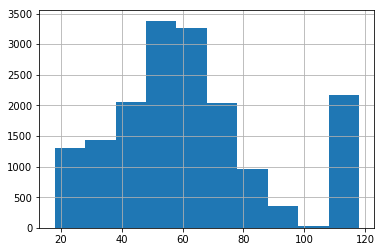

In [14]:
# Deep dive into field: 'age'
profile_clean['age'].hist();

In [15]:
profile_clean['age'][profile_clean['age'] == 118].count() / profile_clean.shape[0] * 100

12.794117647058822

In [16]:
# Investigate age of '118' which skews the distribution
profile_age_raw = profile_clean.groupby('age').count().sort_values('age', ascending=False).reset_index()

# Percentage of records impacted
pct_incorr_age_profile = profile_clean['age'][profile_clean['age'] == 118].count() / profile_clean.shape[0] * 100
print('This impacts {} of records in the Profile dataset'.format(profile_clean['age'][profile_clean['age'] == 118].count()))
print('This impacts {}% of records in the Profile dataset'.format(pct_incorr_age_profile))

# Quick look at number of records with age '118'
profile_age_raw.head(10)

This impacts 2175 of records in the Profile dataset
This impacts 12.794117647058822% of records in the Profile dataset


,age,became_member_on,gender,id,income
0,118,2175,0,2175,0
1,101,5,5,5,5
2,100,12,12,12,12
3,99,5,5,5,5
4,98,5,5,5,5
5,97,13,13,13,13
6,96,8,8,8,8
7,95,22,22,22,22
8,94,33,33,33,33
9,93,29,29,29,29


In [17]:
# Cross check for null values
profile_clean[profile_clean['age'] == 118].isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

All 2175 profiles with age '118' have Null 'gender' and 'income'.
This impacts 12.79% of profiles.

The age of '118' is not sensible and it should be excluded from the analysis.
Therefore, we will drop these records.

In [18]:
# Drop the records with Null 'gender', 'income'
profile_clean = profile_clean.dropna()

In [19]:
# Check that Null records are dropped
profile_clean.isnull().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

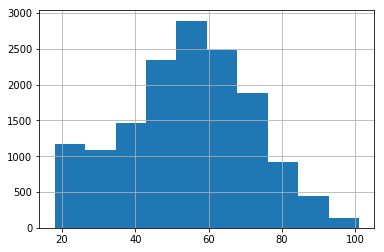

In [20]:
# Re-perform Deep dive into field: 'age'
profile_clean['age'].hist();

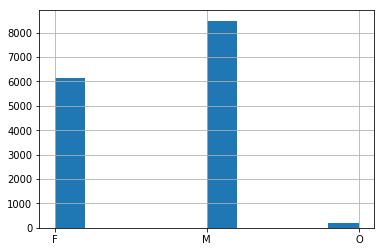

In [21]:
# Deep dive into field: 'gender'
profile_clean['gender'].hist();

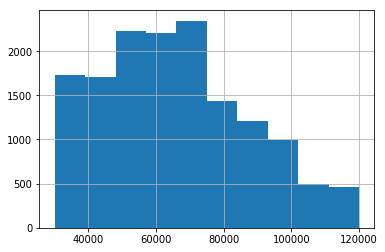

In [22]:
# Deep dive into field: 'income'
profile_clean['income'].hist();

In [23]:
# Create an alternative view of 'became_member_on' field - as number of days each person is a member ('days_as_members')

# As a point of comparison - we will take the latest date as baseline
max_date_str = profile_clean['became_member_on'].max().astype(str)
max_date_obj = datetime.strptime(max_date_str, '%Y%m%d')
print('Comparison date: {}'.format(max_date_obj))

# Convert 'became_member_on' to date format
profile_clean['became_member_on_date'] = profile_clean['became_member_on'].astype(str)
profile_clean['became_member_on_date'] = profile_clean['became_member_on_date'].apply(lambda x : datetime.strptime(x, '%Y%m%d')) 

# Add in new column: 'days_as_member' - and take the max date vs became member on date to find the number of days as member
profile_clean['days_as_members'] = max_date_obj - profile_clean['became_member_on_date']
profile_clean['days_as_members'] = profile_clean['days_as_members'].apply(lambda x : x.days)

# Quick view
profile_clean.head()

Comparison date: 2018-07-26 00:00:00


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,age,became_member_on,gender,id,income,became_member_on_date,days_as_members
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,376
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,443
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26,91
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09,167
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11,257


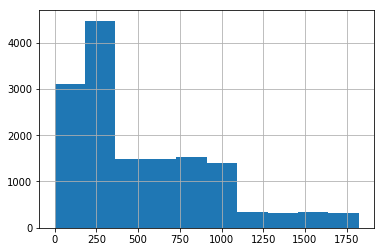

In [24]:
# Deep dive into field: 'days_as_members'
profile_clean['days_as_members'].hist();

In [25]:
# Quick corrplot of all fields

corr = profile_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,became_member_on,income,days_as_members
age,1,-0.013425,0.306703,0.0123005
became_member_on,-0.013425,1,-0.0290087,-0.976378
income,0.306703,-0.0290087,1,0.0257688
days_as_members,0.0123005,-0.976378,0.0257688,1


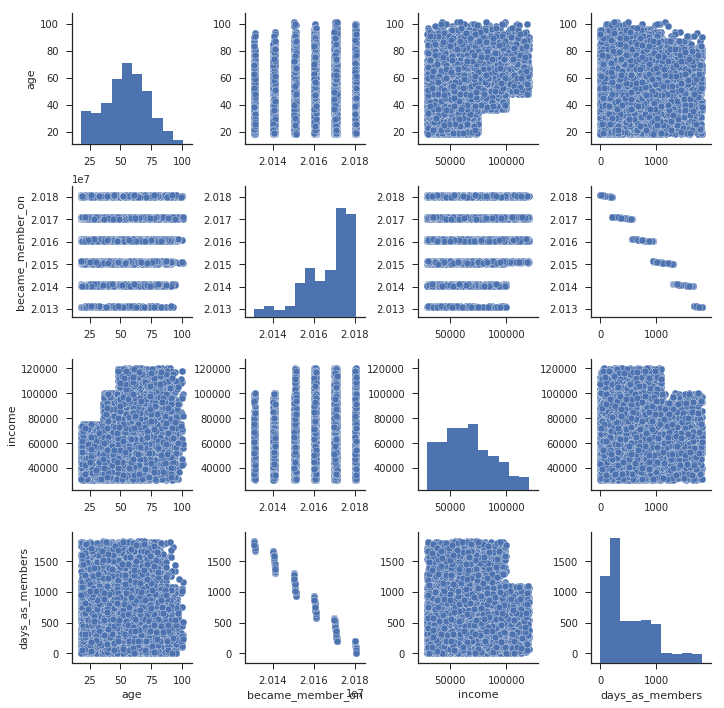

In [26]:
# Quick pairplot of all fields

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(profile_clean)

In [27]:
# Rename 'person' column
profile_clean.rename(columns={'id':'cust_id'},inplace=True)

# Quick view
profile_clean.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,age,became_member_on,gender,cust_id,income,became_member_on_date,days_as_members
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017-07-15,376
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017-05-09,443
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,2018-04-26,91
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018-02-09,167
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017-11-11,257


<a id='4.03' ></a>
## 4.03: Transcript data

**Source:**
- transcript.json

**Contains:**
- records for transactions, offers received, offers viewed, and offers completed

**Fields:**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

---------------------------------------------------------------------------------------------------------------------

**Key callouts from report below:**
- There are no null values
- 'value' column should be broken into 
    > - 'offer_id'
    > - 'amount'
    > - 'reward'
- 'transcript.person' is a key, and equivalent to 'profile.id'
    > - rename to 'cust_id' for consistency
- 'transcript.value[offer_id]' is equivalent to 'portfolio.id'
    > - rename to 'offer_id' for consistency


In [28]:
# Generate meta data report for Transcript dataset
explore_data(transcript, n_unique_value=20)

####################################################################################################
####################################################################################################
Meta data report for dataset
####################################################################################################
####################################################################################################
 
Number of rows/records: 306534
Number of columns/fields: 4
----------------------------------------------------------------------------------------------------
 
Column names:
['event', 'person', 'time', 'value']
----------------------------------------------------------------------------------------------------
 
Data types per column:
event     object
person    object
time       int64
value     object
dtype: object
----------------------------------------------------------------------------------------------------
 
Uniques values per Column:
event         

In [29]:
# Create copy of dataset
transcript_clean = transcript

In [30]:
# Expand the 'value' column into 3 fields:
#  - offer_id
#  - amount
#  - reward
transcript_clean =pd.concat([transcript_clean, transcript_clean['value'].apply(pd.Series)], axis=1)

# Quick view
transcript_clean.head()

,event,person,time,value,offer id,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


It seems that 2 'offer_id' columns were created from the 'value' column.
We will investigate this further.

In [31]:
# Quick view using tail()
transcript_clean.tail(20)

,event,person,time,value,offer id,amount,offer_id,reward
306514,transaction,f1e4fd36e5a0446f83861308bddf6945,714,{'amount': 8.2},NaN,8.20,NaN,NaN
306515,transaction,0b64be3b241c4407a5c9a71781173829,714,{'amount': 2.6},NaN,2.60,NaN,NaN
306516,transaction,86d03d35d7e0434b935e7743e83be3a0,714,{'amount': 9.2},NaN,9.20,NaN,NaN
306517,transaction,3408fd05c781401f8442fb6dbaaea9c7,714,{'amount': 11.7},NaN,11.70,NaN,NaN
306518,transaction,1593d617fac246ef8e50dbb0ffd77f5f,714,{'amount': 40.67},NaN,40.67,NaN,NaN
306519,transaction,f1b31d07b5d84f69a2d5f1d07843989e,714,{'amount': 31.13},NaN,31.13,NaN,NaN
306520,transaction,2ce987015ec0404a97ba333e8e814090,714,{'amount': 1.6400000000000001},NaN,1.64,NaN,NaN
306521,transaction,2e33545f0a764d27b2ccff95fc8d72c4,714,{'amount': 17.35},NaN,17.35,NaN,NaN
306522,transaction,d1c4500ace2e45e9a45d3cd2fccac8d8,714,{'amount': 4.42},NaN,4.42,NaN,NaN
306523,transaction,b65affd9e07346a1906364a396950e3d,714,{'amount': 18.35},NaN,18.35,NaN,NaN


In [32]:
# Checking the distribution of values in the table
transcript_clean.groupby('event').count()

,person,time,value,offer id,amount,offer_id,reward
event,,,,,,,
offer completed,33579,33579,33579,0,0,33579,33579
offer received,76277,76277,76277,76277,0,0,0
offer viewed,57725,57725,57725,57725,0,0,0
transaction,138953,138953,138953,0,138953,0,0


In [33]:
# Checking the number of non-null values in each field
transcript_clean.notnull().sum()

event       306534
person      306534
time        306534
value       306534
offer id    134002
amount      138953
offer_id     33579
reward       33579
dtype: int64

From the checks above, we can see that all 33579 non-null values in 'offer_id' and 'reward' are for the 'offer completed' event. There are no corresponding 'offer id' non-null values for these records.

All the non-values in 'offer id' are for the 'offer received' and 'offer viewed' events. There are no corresponding 'offer_id' non-null values for these records.

Therefore, we can consolidate the 'offer_id' and 'offer id' fields into a single field. We will name this field 'offer_id'.

In [34]:
# consolidate the 'offer_id' and 'offer id' fields into 'offer_id_consol'
transcript_clean['offer_id_consol'] = np.where(transcript_clean['offer id'].isnull() & transcript_clean['offer_id'].notnull(),
                                         transcript_clean['offer_id'],
                                         transcript_clean['offer id'])


In [35]:
# Re-Checking the distribution of values in the table
transcript_clean.groupby('event').count()

,person,time,value,offer id,amount,offer_id,reward,offer_id_consol
event,,,,,,,,
offer completed,33579,33579,33579,0,0,33579,33579,33579
offer received,76277,76277,76277,76277,0,0,0,76277
offer viewed,57725,57725,57725,57725,0,0,0,57725
transaction,138953,138953,138953,0,138953,0,0,0


The 'offer_id_consol' field now has all the offer ids in both the source columns 'offer_id', 'offer id'.

We can now drop the source columns 'value', 'offer_id', 'offer id'.

In [36]:
# Drop the source columns 'value', 'offer_id', 'offer id'.
transcript_clean.drop(['value','offer id','offer_id'],axis=1,inplace=True)

# Rename 'offer_id_consol' column
transcript_clean.rename(columns={'offer_id_consol':'offer_id'},inplace=True)

# Quick view
transcript_clean.tail(10)

,event,person,time,amount,reward,offer_id
306524,transaction,d613ca9c59dd42f497bdbf6178da54a7,714,25.14,NaN,NaN
306525,transaction,eec70ab28af74a22a4aeb889c0317944,714,43.58,NaN,NaN
306526,transaction,24f56b5e1849462093931b164eb803b5,714,22.64,NaN,NaN
306527,offer completed,24f56b5e1849462093931b164eb803b5,714,NaN,2.0,fafdcd668e3743c1bb461111dcafc2a4
306528,transaction,5ca2620962114246ab218fc648eb3934,714,2.20,NaN,NaN
306529,transaction,b3a1272bc9904337b331bf348c3e8c17,714,1.59,NaN,NaN
306530,transaction,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53,NaN,NaN
306531,transaction,a00058cf10334a308c68e7631c529907,714,3.61,NaN,NaN
306532,transaction,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53,NaN,NaN
306533,transaction,c02b10e8752c4d8e9b73f918558531f7,714,4.05,NaN,NaN


In [37]:
# Add a sequence indicator in the 'event' field
transcript_clean['event'] = np.where(transcript_clean['event'] == 'offer received',
                                         '1. offer received',
                                         transcript_clean['event'])
transcript_clean['event'] = np.where(transcript_clean['event'] == 'offer viewed',
                                         '2. offer viewed',
                                         transcript_clean['event'])
transcript_clean['event'] = np.where(transcript_clean['event'] == 'transaction',
                                         '3. transaction',
                                         transcript_clean['event'])
transcript_clean['event'] = np.where(transcript_clean['event'] == 'offer completed',
                                         '4. offer completed',
                                         transcript_clean['event'])

# Quick check that sequence indicator has been added
transcript_clean['event'].unique()

array(['1. offer received', '2. offer viewed', '3. transaction',
       '4. offer completed'], dtype=object)

In [38]:
# Rename 'person' column
transcript_clean.rename(columns={'person':'cust_id'},inplace=True)

# Quick view
transcript_clean.head()

,event,cust_id,time,amount,reward,offer_id
0,1. offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,1. offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,1. offer received,e2127556f4f64592b11af22de27a7932,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,1. offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,1. offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


<a id='5' ></a>
# 5: Data pre-processing

We will take the following steps to prepare the data for next steps:
> - Assign offer_id to each transaction (where applicable)
> - Determine the distinct types of transactions, whether it is driven by the offer and categorize each transaction



<a id='5.01' ></a>
## 5.01: Assigning offer_id to each transaction - where applicable

We start by merging the transcript and portfolio tables. This provides the base for us to determine how many instances of each event happens for each offer type.

A few key points that we can see below:
 - for 'bogo' and 'discount' offers 
    > - there are events - offer 'received', 'viewed', 'completed'
    > - the number of event instances decreases as it moves from offer 'received' -> 'viewed' -> 'completed', suggesting that not all received offers are viewed, and not all viewed offers are completed
 - for 'informational' offers 
    > - there are events - offer 'received', 'viewed', but none for 'completed'   
    > - the number of event instances decreases as it moves from offer 'received' -> 'viewed'
 - for 'all' offers
    > - there are no 'transaction' events


From these points we can formulate some guidelines and actions:
1. we need to associate 'transaction' events to an 'offer_id'
2. a complete event journey for
    > - 'bogo' and 'discount' offers = 'offer received' -> 'offer viewed' -> 'transaction' -> 'offer completed'
    > - 'informational' offers = 'offer received' -> 'offer viewed' -> 'transaction'


Steps we will take are as follows:
1. [5.01.1: Explore the data](#5.01.1)
2. [5.01.2: Identify 'offer_start_time' for each 'offer viewed' based on associated 'offer received'](#5.01.2)
3. [5.01.3: Identify 'offer_start_time' for each 'offer completed' based on associated 'offer received'](#5.01.3)
4. [5.01.4: Re-assign 'offer_id' for each 'transaction' event that is followed by an 'offer_completed' event](#5.01.4)
5. [5.01.5: Assign an 'offer_id', 'offer_start_time' to each 'transaction' event if there a preceding 'offer received' event](#5.01.5)

<a id='5.01.1' ></a>
### 5.01.1: Explore the data

In [39]:
# Merge transcript and portfolio
transcript_portfolio = transcript_clean.merge(portfolio_clean, how = 'left', on = 'offer_id')
transcript_portfolio = transcript_portfolio.sort_values(['cust_id', 'time'])
transcript_portfolio = transcript_portfolio.reset_index(drop=True)

# Quick view
transcript_portfolio.head()

,event,cust_id,time,amount,reward,offer_id,offer_difficulty,offer_duration,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,1. offer received,0009655768c64bdeb2e877511632db8f,168,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
1,2. offer viewed,0009655768c64bdeb2e877511632db8f,192,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
2,3. transaction,0009655768c64bdeb2e877511632db8f,228,22.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1. offer received,0009655768c64bdeb2e877511632db8f,336,NaN,NaN,3f207df678b143eea3cee63160fa8bed,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
4,2. offer viewed,0009655768c64bdeb2e877511632db8f,372,NaN,NaN,3f207df678b143eea3cee63160fa8bed,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0


In [40]:
# Identify the exhaustive unique events
list(transcript_portfolio['event'].unique())

['1. offer received',
 '2. offer viewed',
 '3. transaction',
 '4. offer completed']

In [41]:
# Determine the number of records for each events, offer_type
transcript_portfolio.groupby(['offer_type', 'event'])['event'].count()

offer_type     event             
bogo           1. offer received     30499
               2. offer viewed       25449
               4. offer completed    15669
discount       1. offer received     30543
               2. offer viewed       21445
               4. offer completed    17910
informational  1. offer received     15235
               2. offer viewed       10831
Name: event, dtype: int64

In [42]:
# Determine the number of records for each event
transcript_portfolio.groupby('event')['event'].count()

event
1. offer received      76277
2. offer viewed        57725
3. transaction        138953
4. offer completed     33579
Name: event, dtype: int64

In [43]:
# Create a copy
transcript_portfolio_clean = transcript_portfolio
print('Columns available: {}'.format(list(transcript_portfolio_clean.columns)))

Columns available: ['event', 'cust_id', 'time', 'amount', 'reward', 'offer_id', 'offer_difficulty', 'offer_duration', 'offer_type', 'offer_reward', 'channel_email', 'channel_mobile', 'channel_social', 'channel_web']


In [44]:
# Check null values of offer_id
transcript_portfolio_clean_offeridnull = \
    transcript_portfolio_clean[['event', 'cust_id', 'time', 'amount', 'reward', 'offer_id', 'offer_type']] \
    [(transcript_portfolio_clean['offer_id'].isnull())]

transcript_portfolio_clean_offeridnull.groupby(['event'])['event'].count()

event
3. transaction    138953
Name: event, dtype: int64

It can be seen that every transaction event has no offer_id. We will take steps to overcome this.

<a id='5.01.2' ></a>
### 5.01.2: Identify 'offer_start_time' for each 'offer viewed' based on associated 'offer received'
Identify for each 'offer viewed', what is the associated 'offer received'. This will enable us to assign an 'offer_start_time' to these 2 events.

In [45]:
# Add in placeholder field for offer_start_time
transcript_portfolio_clean['offer_start_time'] = np.NaN

In [46]:
# create checkpoint dataset for review and backup
transcript_portfolio_clean_512 = transcript_portfolio_clean

In [47]:
# df shape
analysis_set = transcript_portfolio_clean_512
print('Shape of data set: {}'.format(analysis_set.shape))
print('-' * 50)
print(' ' * 50)

# check current null instances
print('Null instances in 1. offer received: ')
print(analysis_set[analysis_set['event'] == '1. offer received'].isnull().sum())
print('-' * 50)

print('Null instances in 2. offer viewed: ')
print(analysis_set[analysis_set['event'] == '2. offer viewed'].isnull().sum())
print('-' * 50)

print('Null instances in 3. transaction: ')
print(analysis_set[analysis_set['event'] == '3. transaction'].isnull().sum())
print('-' * 50)

print('Null instances in 4. offer completed: ')
print(analysis_set[analysis_set['event'] == '4. offer completed'].isnull().sum())
print('-' * 50)

Shape of data set: (306534, 15)
--------------------------------------------------
                                                  
Null instances in 1. offer received: 
event                   0
cust_id                 0
time                    0
amount              76277
reward              76277
offer_id                0
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0
channel_web             0
offer_start_time    76277
dtype: int64
--------------------------------------------------
Null instances in 2. offer viewed: 
event                   0
cust_id                 0
time                    0
amount              57725
reward              57725
offer_id                0
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0


In [48]:
# filter dataset for offer is viewed after an offer is received
offers_received_viewed = transcript_portfolio_clean[['cust_id', 'time', 'event', 'offer_id']] \
    [(transcript_portfolio_clean['event']=='1. offer received') | (transcript_portfolio_clean['event']=='2. offer viewed')]

# Order the records
offers_received_viewed.sort_values(['cust_id', 'time', 'event'])

# Create new fields capturing the shifted offer_id, time, event, partition by cust_id
offers_received_viewed['offer_id_shift_dwby_1'] = offers_received_viewed.groupby(['cust_id'])['offer_id'].shift(1)
offers_received_viewed['time_shift_dwby_1'] = offers_received_viewed.groupby(['cust_id'])['time'].shift(1)
offers_received_viewed['event_shift_dwby_1'] = offers_received_viewed.groupby(['cust_id'])['event'].shift(1)

# Quick view
offers_received_viewed.head(10)

,cust_id,time,event,offer_id,offer_id_shift_dwby_1,time_shift_dwby_1,event_shift_dwby_1
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837,168.0,1. offer received
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,5a8bc65990b245e5a138643cd4eb9837,192.0,2. offer viewed
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,3f207df678b143eea3cee63160fa8bed,336.0,1. offer received
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,3f207df678b143eea3cee63160fa8bed,372.0,2. offer viewed
8,0009655768c64bdeb2e877511632db8f,456,2. offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,f19421c1d4aa40978ebb69ca19b0e20d,408.0,1. offer received
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,f19421c1d4aa40978ebb69ca19b0e20d,456.0,2. offer viewed
12,0009655768c64bdeb2e877511632db8f,540,2. offer viewed,fafdcd668e3743c1bb461111dcafc2a4,fafdcd668e3743c1bb461111dcafc2a4,504.0,1. offer received
14,0009655768c64bdeb2e877511632db8f,576,1. offer received,2906b810c7d4411798c6938adc9daaa5,fafdcd668e3743c1bb461111dcafc2a4,540.0,2. offer viewed
20,00116118485d4dfda04fdbaba9a87b5c,168,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,NaN


In [49]:
# Derive offer start time for each offer - by matching offer received and offer viewed
offers_received_viewed['offer_start_time'] =np.where(\
                     (offers_received_viewed['event'] == '2. offer viewed')\
                     & (offers_received_viewed['event_shift_dwby_1'] == '1. offer received')\
                     & (offers_received_viewed['offer_id'] == offers_received_viewed['offer_id_shift_dwby_1'])\
                     ,offers_received_viewed['time_shift_dwby_1']\
                     ,offers_received_viewed['time'])

# keep the existing offers_received_viewed fields
offers_received_viewed = offers_received_viewed[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']]

# drop duplicate records from lookup table
offers_received_viewed = offers_received_viewed.drop_duplicates(keep='first')

# Quick view
offers_received_viewed.head(20)

,cust_id,time,event,offer_id,offer_start_time
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0
8,0009655768c64bdeb2e877511632db8f,456,2. offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,408.0
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0
12,0009655768c64bdeb2e877511632db8f,540,2. offer viewed,fafdcd668e3743c1bb461111dcafc2a4,504.0
14,0009655768c64bdeb2e877511632db8f,576,1. offer received,2906b810c7d4411798c6938adc9daaa5,576.0
20,00116118485d4dfda04fdbaba9a87b5c,168,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,168.0


In [50]:
# Check that all offer viewed events have an offer start time
offers_received_viewed.query(" event == '2. offer viewed' ").isnull().sum()

cust_id             0
time                0
event               0
offer_id            0
offer_start_time    0
dtype: int64

In [51]:
# merge the data sets
transcript_portfolio_clean = transcript_portfolio_clean \
    .merge(offers_received_viewed,how='left',on=['cust_id','time','event', 'offer_id'])

# unify multiple offer_start_time columns into one column
transcript_portfolio_clean['offer_start_time']=np.where(transcript_portfolio_clean['offer_start_time_x'].isnull(), \
                                                transcript_portfolio_clean['offer_start_time_y'], \
                                                transcript_portfolio_clean['offer_start_time_x'])

# drop duplicate columns
drop_cols(transcript_portfolio_clean, ['offer_start_time_x', 'offer_start_time_y'], inplace=True);

# Quick view
transcript_portfolio_clean.head(20)

,event,cust_id,time,amount,reward,offer_id,offer_difficulty,offer_duration,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web,offer_start_time
0,1. offer received,0009655768c64bdeb2e877511632db8f,168,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0,168.0
1,2. offer viewed,0009655768c64bdeb2e877511632db8f,192,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0,168.0
2,3. transaction,0009655768c64bdeb2e877511632db8f,228,22.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1. offer received,0009655768c64bdeb2e877511632db8f,336,NaN,NaN,3f207df678b143eea3cee63160fa8bed,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0,336.0
4,2. offer viewed,0009655768c64bdeb2e877511632db8f,372,NaN,NaN,3f207df678b143eea3cee63160fa8bed,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0,336.0
5,1. offer received,0009655768c64bdeb2e877511632db8f,408,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,408.0
6,3. transaction,0009655768c64bdeb2e877511632db8f,414,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4. offer completed,0009655768c64bdeb2e877511632db8f,414,NaN,5.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,NaN
8,2. offer viewed,0009655768c64bdeb2e877511632db8f,456,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,408.0
9,1. offer received,0009655768c64bdeb2e877511632db8f,504,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0,504.0


<a id='5.01.3' ></a>
### 5.01.3: Identify 'offer_start_time' for each 'offer completed' based on associated 'offer received'
Identify for each 'offer completed', what is the associated 'offer received'. This will enable us to assign an 'offer_start_time' to these 2 events.

In [52]:
# create checkpoint dataset for review and backup
transcript_portfolio_clean_513 = transcript_portfolio_clean

In [53]:
# transcript_portfolio_clean = transcript_portfolio_clean_513

In [54]:
# df shape
analysis_set = transcript_portfolio_clean_513
print('Shape of data set: {}'.format(analysis_set.shape))
print('-' * 50)
print(' ' * 50)

# check current null instances
print('Null instances in 1. offer received: ')
print(analysis_set[analysis_set['event'] == '1. offer received'].isnull().sum())
print('-' * 50)

print('Null instances in 2. offer viewed: ')
print(analysis_set[analysis_set['event'] == '2. offer viewed'].isnull().sum())
print('-' * 50)

print('Null instances in 3. transaction: ')
print(analysis_set[analysis_set['event'] == '3. transaction'].isnull().sum())
print('-' * 50)

print('Null instances in 4. offer completed: ')
print(analysis_set[analysis_set['event'] == '4. offer completed'].isnull().sum())
print('-' * 50)

Shape of data set: (306534, 15)
--------------------------------------------------
                                                  
Null instances in 1. offer received: 
event                   0
cust_id                 0
time                    0
amount              76277
reward              76277
offer_id                0
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0
channel_web             0
offer_start_time        0
dtype: int64
--------------------------------------------------
Null instances in 2. offer viewed: 
event                   0
cust_id                 0
time                    0
amount              57725
reward              57725
offer_id                0
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0


In [55]:
# filter dataset for offer is completed after a transaction
offers_received_completed = transcript_portfolio_clean[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']] \
    [(transcript_portfolio_clean['event']=='1. offer received') | (transcript_portfolio_clean['event']=='4. offer completed')]

# Order the records
offers_received_completed = offers_received_completed.sort_values(['cust_id', 'offer_id', 'time', 'event'])

# Create new fields capturing the shifted offer_id, time, event, partition by cust_id
offers_received_completed['offer_id_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['offer_id'].shift(1)
offers_received_completed['offer_start_time_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['offer_start_time'].shift(1)
offers_received_completed['time_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['time'].shift(1)
offers_received_completed['event_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['event'].shift(1)

# Quick view
offers_received_completed.head(20)

,cust_id,time,event,offer_id,offer_start_time,offer_id_shift_dwby_1,offer_start_time_shift_dwby_1,time_shift_dwby_1,event_shift_dwby_1
14,0009655768c64bdeb2e877511632db8f,576,1. offer received,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,NaN,NaN,NaN
16,0009655768c64bdeb2e877511632db8f,576,4. offer completed,2906b810c7d4411798c6938adc9daaa5,NaN,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,1. offer received
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,NaN,NaN
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,NaN,NaN
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,NaN,NaN,NaN
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,NaN,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408.0,1. offer received
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0,NaN,NaN,NaN,NaN
11,0009655768c64bdeb2e877511632db8f,528,4. offer completed,fafdcd668e3743c1bb461111dcafc2a4,NaN,fafdcd668e3743c1bb461111dcafc2a4,504.0,504.0,1. offer received
20,00116118485d4dfda04fdbaba9a87b5c,168,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,168.0,NaN,NaN,NaN,NaN
25,00116118485d4dfda04fdbaba9a87b5c,576,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,576.0,f19421c1d4aa40978ebb69ca19b0e20d,168.0,168.0,1. offer received


In [56]:
# Derive offer start time for each offer - by matching offer completed and transaction
offers_received_completed['offer_start_time'] =np.where(
                       (offers_received_completed['offer_start_time'].isnull()) 
                     & (offers_received_completed['event'] == '4. offer completed')
                     & (offers_received_completed['event_shift_dwby_1'] == '1. offer received')                                                      
                     & (offers_received_completed['offer_id'] == offers_received_completed['offer_id_shift_dwby_1'])
                     & (offers_received_completed['time'] >= offers_received_completed['time_shift_dwby_1'])                                                         
                     ,offers_received_completed['offer_start_time_shift_dwby_1']
                     ,offers_received_completed['offer_start_time'])

# keep the existing offers_received_viewed fields
offers_received_completed = offers_received_completed[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']]

# Quick view
offers_received_completed

,cust_id,time,event,offer_id,offer_start_time
14,0009655768c64bdeb2e877511632db8f,576,1. offer received,2906b810c7d4411798c6938adc9daaa5,576.0
16,0009655768c64bdeb2e877511632db8f,576,4. offer completed,2906b810c7d4411798c6938adc9daaa5,576.0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,408.0
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0
11,0009655768c64bdeb2e877511632db8f,528,4. offer completed,fafdcd668e3743c1bb461111dcafc2a4,504.0
20,00116118485d4dfda04fdbaba9a87b5c,168,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,168.0
25,00116118485d4dfda04fdbaba9a87b5c,576,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,576.0


In [57]:
# Check number of null instances
offers_received_completed.isnull().sum()

cust_id               0
time                  0
event                 0
offer_id              0
offer_start_time    478
dtype: int64

In [58]:
# Loop through the data set to assign 'offer_start_time' from 'offer completed' that already have that time.
# This can only be done between 'offer completed' events that have the:
#  - same 'cust_id'
#  - same 'offer_id'
#  - event that already has 'offer_start_time' happens before event with incomplete 'offer start time' 

# Using 10 iterations as it eliminates the nulls
n = 10
i = 1
while i <= n:   
    print('Iteration: {} - start'.format(i))
    
    # filter dataset for offer is completed after a transaction
    offers_received_completed = offers_received_completed[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']] \
        [(offers_received_completed['event']=='4. offer completed')]

    # Order the records
    offers_received_completed = offers_received_completed.sort_values(['cust_id', 'offer_id', 'time', 'event'])

    # Create new fields capturing the shifted offer_id, time, event, partition by cust_id
    offers_received_completed['offer_id_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['offer_id'].shift(1)
    offers_received_completed['offer_start_time_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['offer_start_time'].shift(1)
    offers_received_completed['time_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['time'].shift(1)
    offers_received_completed['event_shift_dwby_1'] = offers_received_completed.groupby(['cust_id', 'offer_id'])['event'].shift(1) 
    
    # Derive offer start time for each offer - by matching offer completed and transaction
    offers_received_completed['offer_start_time'] =np.where(
                           (offers_received_completed['offer_start_time'].isnull()) 
                         & (offers_received_completed['event'] == '4. offer completed')
                         & (offers_received_completed['event_shift_dwby_1'] == '4. offer completed')                                                      
                         & (offers_received_completed['offer_id'] == offers_received_completed['offer_id_shift_dwby_1'])
                         & (offers_received_completed['time'] >= offers_received_completed['time_shift_dwby_1'])                                                         
                         ,offers_received_completed['offer_start_time_shift_dwby_1']
                         ,offers_received_completed['offer_start_time'])

    # keep the existing offers_received_viewed fields
    offers_received_completed = offers_received_completed[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']]
    
    print('Iteration: {} - complete'.format(i))
    
    i = i+1
    

# drop duplicate records from lookup table
offers_received_completed = offers_received_completed.drop_duplicates(keep='first')
    

Iteration: 1 - start
Iteration: 1 - complete
Iteration: 2 - start
Iteration: 2 - complete
Iteration: 3 - start
Iteration: 3 - complete
Iteration: 4 - start
Iteration: 4 - complete
Iteration: 5 - start
Iteration: 5 - complete
Iteration: 6 - start
Iteration: 6 - complete
Iteration: 7 - start
Iteration: 7 - complete
Iteration: 8 - start
Iteration: 8 - complete
Iteration: 9 - start
Iteration: 9 - complete
Iteration: 10 - start
Iteration: 10 - complete


In [59]:
# Recheck null value instances
offers_received_completed.isnull().sum()

cust_id             0
time                0
event               0
offer_id            0
offer_start_time    0
dtype: int64

In [60]:
# merge the data sets
transcript_portfolio_clean = transcript_portfolio_clean \
    .merge(offers_received_completed,how='left',on=['cust_id','time','event', 'offer_id'])


# unify multiple offer_start_time columns into one column
transcript_portfolio_clean['offer_start_time']=np.where(transcript_portfolio_clean['offer_start_time_x'].isnull(), \
                                                transcript_portfolio_clean['offer_start_time_y'], \
                                                transcript_portfolio_clean['offer_start_time_x'])

# drop duplicate columns
drop_cols(transcript_portfolio_clean, ['offer_start_time_x', 'offer_start_time_y'], inplace=True);


# Quick view
transcript_portfolio_clean.head(20)

,event,cust_id,time,amount,reward,offer_id,offer_difficulty,offer_duration,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web,offer_start_time
0,1. offer received,0009655768c64bdeb2e877511632db8f,168,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0,168.0
1,2. offer viewed,0009655768c64bdeb2e877511632db8f,192,NaN,NaN,5a8bc65990b245e5a138643cd4eb9837,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0,168.0
2,3. transaction,0009655768c64bdeb2e877511632db8f,228,22.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1. offer received,0009655768c64bdeb2e877511632db8f,336,NaN,NaN,3f207df678b143eea3cee63160fa8bed,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0,336.0
4,2. offer viewed,0009655768c64bdeb2e877511632db8f,372,NaN,NaN,3f207df678b143eea3cee63160fa8bed,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0,336.0
5,1. offer received,0009655768c64bdeb2e877511632db8f,408,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,408.0
6,3. transaction,0009655768c64bdeb2e877511632db8f,414,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4. offer completed,0009655768c64bdeb2e877511632db8f,414,NaN,5.0,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,408.0
8,2. offer viewed,0009655768c64bdeb2e877511632db8f,456,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0,408.0
9,1. offer received,0009655768c64bdeb2e877511632db8f,504,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0,504.0


<a id='5.01.4' ></a>
### 5.01.4: Re-assign 'offer_id' for each 'transaction' event that is followed by an 'offer_completed' event 
Identify for each 'offer completed', what is the associated 'transaction'. Both events would have occurred at the same time. This will enable us to assign 'offer_start_time' to 'offer completed' events.

In [61]:
# create checkpoint dataset for review and backup
transcript_portfolio_clean_514 = transcript_portfolio_clean

In [62]:
# df shape
analysis_set = transcript_portfolio_clean_514
print('Shape of data set: {}'.format(analysis_set.shape))
print('-' * 50)
print(' ' * 50)

# check current null instances
print('Null instances in 1. offer received: ')
print(analysis_set[analysis_set['event'] == '1. offer received'].isnull().sum())
print('-' * 50)

print('Null instances in 2. offer viewed: ')
print(analysis_set[analysis_set['event'] == '2. offer viewed'].isnull().sum())
print('-' * 50)

print('Null instances in 3. transaction: ')
print(analysis_set[analysis_set['event'] == '3. transaction'].isnull().sum())
print('-' * 50)

print('Null instances in 4. offer completed: ')
print(analysis_set[analysis_set['event'] == '4. offer completed'].isnull().sum())
print('-' * 50)

Shape of data set: (306534, 15)
--------------------------------------------------
                                                  
Null instances in 1. offer received: 
event                   0
cust_id                 0
time                    0
amount              76277
reward              76277
offer_id                0
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0
channel_web             0
offer_start_time        0
dtype: int64
--------------------------------------------------
Null instances in 2. offer viewed: 
event                   0
cust_id                 0
time                    0
amount              57725
reward              57725
offer_id                0
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0


In [63]:
# filter dataset for offer is completed after a transaction
offers_transacted_completed = transcript_portfolio_clean[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']] \
    [(transcript_portfolio_clean['event']=='3. transaction') | (transcript_portfolio_clean['event']=='4. offer completed')]

# Order the records
offers_transacted_completed.sort_values(['cust_id', 'time', 'event'])

# Create new fields capturing the shifted offer_id, time, event, partition by cust_id
offers_transacted_completed['offer_id_shift_upby_1'] = offers_transacted_completed.groupby(['cust_id', 'time'])['offer_id'].shift(-1)
offers_transacted_completed['offer_start_time_shift_upby_1'] = offers_transacted_completed.groupby(['cust_id', 'time'])['offer_start_time'].shift(-1)
offers_transacted_completed['time_shift_upby_1'] = offers_transacted_completed.groupby(['cust_id', 'time'])['time'].shift(-1)
offers_transacted_completed['event_shift_upby_1'] = offers_transacted_completed.groupby(['cust_id', 'time'])['event'].shift(-1)

# Quick view
offers_transacted_completed.head(20)

,cust_id,time,event,offer_id,offer_start_time,offer_id_shift_upby_1,offer_start_time_shift_upby_1,time_shift_upby_1,event_shift_upby_1
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,NaN,NaN,NaN,NaN,NaN,NaN
6,0009655768c64bdeb2e877511632db8f,414,3. transaction,NaN,NaN,f19421c1d4aa40978ebb69ca19b0e20d,408.0,414.0,4. offer completed
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,NaN,NaN,NaN
10,0009655768c64bdeb2e877511632db8f,528,3. transaction,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,504.0,528.0,4. offer completed
11,0009655768c64bdeb2e877511632db8f,528,4. offer completed,fafdcd668e3743c1bb461111dcafc2a4,504.0,NaN,NaN,NaN,NaN
13,0009655768c64bdeb2e877511632db8f,552,3. transaction,NaN,NaN,NaN,NaN,NaN,NaN
15,0009655768c64bdeb2e877511632db8f,576,3. transaction,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,576.0,576.0,4. offer completed
16,0009655768c64bdeb2e877511632db8f,576,4. offer completed,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,NaN,NaN,NaN
17,0009655768c64bdeb2e877511632db8f,660,3. transaction,NaN,NaN,NaN,NaN,NaN,NaN
18,0009655768c64bdeb2e877511632db8f,690,3. transaction,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Derive offer id, offer start time for each offer - by matching offer completed and transaction
offers_transacted_completed['offer_id'] =np.where(
                       (offers_transacted_completed['event'] == '3. transaction')
                     & (offers_transacted_completed['event_shift_upby_1'] == '4. offer completed')                                                      
                     & (offers_transacted_completed['time'] == offers_transacted_completed['time_shift_upby_1'])                                                         
                     ,offers_transacted_completed['offer_id_shift_upby_1']
                     ,offers_transacted_completed['offer_id'])

offers_transacted_completed['offer_start_time'] =np.where(
                       (offers_transacted_completed['event'] == '3. transaction')
                     & (offers_transacted_completed['event_shift_upby_1'] == '4. offer completed')                                                      
                     & (offers_transacted_completed['time'] == offers_transacted_completed['time_shift_upby_1'])                                                         
                     ,offers_transacted_completed['offer_start_time_shift_upby_1']
                     ,offers_transacted_completed['offer_start_time'])

# keep the existing offers_received_viewed fields
offers_transacted_completed = offers_transacted_completed[['cust_id', 'time', 'event', 'offer_id', 'offer_start_time']]


# filter to only include 'offer completed' event
offers_transacted_completed = offers_transacted_completed[offers_transacted_completed['event'] == '3. transaction']

# drop duplicate records from lookup table
offers_transacted_completed = offers_transacted_completed.drop_duplicates(keep='first')

# include only non null instances
# offers_transacted_completed = offers_transacted_completed.dropna(axis = 0, how ='any') 

# Quick view
offers_transacted_completed.head(20)

,cust_id,time,event,offer_id,offer_start_time
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,NaN,NaN
6,0009655768c64bdeb2e877511632db8f,414,3. transaction,f19421c1d4aa40978ebb69ca19b0e20d,408.0
10,0009655768c64bdeb2e877511632db8f,528,3. transaction,fafdcd668e3743c1bb461111dcafc2a4,504.0
13,0009655768c64bdeb2e877511632db8f,552,3. transaction,NaN,NaN
15,0009655768c64bdeb2e877511632db8f,576,3. transaction,2906b810c7d4411798c6938adc9daaa5,576.0
17,0009655768c64bdeb2e877511632db8f,660,3. transaction,NaN,NaN
18,0009655768c64bdeb2e877511632db8f,690,3. transaction,NaN,NaN
19,0009655768c64bdeb2e877511632db8f,696,3. transaction,NaN,NaN
22,00116118485d4dfda04fdbaba9a87b5c,294,3. transaction,NaN,NaN
23,00116118485d4dfda04fdbaba9a87b5c,456,3. transaction,NaN,NaN


In [65]:
# merge the data sets
transcript_portfolio_clean = transcript_portfolio_clean \
    .merge(offers_transacted_completed,how='left',on=['cust_id','time','event'])

# unify multiple offer_id, offer_start_time columns into one column
transcript_portfolio_clean['offer_id']=np.where(transcript_portfolio_clean['offer_id_x'].isnull(), \
                                                transcript_portfolio_clean['offer_id_y'], \
                                                transcript_portfolio_clean['offer_id_x'])

transcript_portfolio_clean['offer_start_time']=np.where(transcript_portfolio_clean['offer_start_time_x'].isnull(), \
                                                transcript_portfolio_clean['offer_start_time_y'], \
                                                transcript_portfolio_clean['offer_start_time_x'])

# drop duplicate columns
drop_cols(transcript_portfolio_clean, ['offer_id_x', 'offer_id_y', 'offer_start_time_x', 'offer_start_time_y'], inplace=True);


# keep the existing transcript fields
transcript_portfolio_clean = transcript_portfolio_clean[['cust_id', 'time', 'event'
                                                         ,'offer_id', 'offer_start_time', 'amount', 'reward']]


# re-merge the transcript and portfolio data sets
transcript_portfolio_clean = transcript_portfolio_clean.merge(portfolio_clean, how = 'left', on = 'offer_id')
transcript_portfolio_clean = transcript_portfolio_clean.sort_values(['cust_id', 'time'])
transcript_portfolio_clean = transcript_portfolio_clean.reset_index(drop=True)


# Quick view
transcript_portfolio_clean.head(20)

,cust_id,time,event,offer_id,offer_start_time,amount,reward,offer_difficulty,offer_duration,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,NaN,NaN,22.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
6,0009655768c64bdeb2e877511632db8f,414,3. transaction,f19421c1d4aa40978ebb69ca19b0e20d,408.0,8.57,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,5.0,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
8,0009655768c64bdeb2e877511632db8f,456,2. offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0,NaN,NaN,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0


<a id='5.01.5' ></a>
### 5.01.5: Assign an 'offer_id', 'offer_start_time' to each 'transaction' event if there a preceding 'offer received' event
Identify for each 'transaction', is there a preceding 'offer received'. We will assume that once an offer has been received, all following transactions are related to the received offer. There will be some transactions that do not have an offer_id. This will enable us to assign 'offer_id' to 'transaction' events and also 'offer_start_time'.

In [66]:
# create checkpoint dataset for review and backup
transcript_portfolio_clean_515 = transcript_portfolio_clean
# transcript_portfolio_clean = transcript_portfolio_clean_515

In [67]:
# df shape
analysis_set = transcript_portfolio_clean_515
print('Shape of data set: {}'.format(analysis_set.shape))
print('-' * 50)
print(' ' * 50)

# check current null instances
print('Null instances in 1. offer received: ')
print(analysis_set[analysis_set['event'] == '1. offer received'].isnull().sum())
print('-' * 50)

print('Null instances in 2. offer viewed: ')
print(analysis_set[analysis_set['event'] == '2. offer viewed'].isnull().sum())
print('-' * 50)

print('Null instances in 3. transaction: ')
print(analysis_set[analysis_set['event'] == '3. transaction'].isnull().sum())
print('-' * 50)

print('Null instances in 4. offer completed: ')
print(analysis_set[analysis_set['event'] == '4. offer completed'].isnull().sum())
print('-' * 50)

Shape of data set: (306534, 15)
--------------------------------------------------
                                                  
Null instances in 1. offer received: 
cust_id                 0
time                    0
event                   0
offer_id                0
offer_start_time        0
amount              76277
reward              76277
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0
channel_web             0
dtype: int64
--------------------------------------------------
Null instances in 2. offer viewed: 
cust_id                 0
time                    0
event                   0
offer_id                0
offer_start_time        0
amount              57725
reward              57725
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0


In [68]:
# sort by cust_id, time
transcript_portfolio_clean.sort_values(['cust_id', 'time'])

# filter dataset for transactions that occur after an offer is received
offers_received_transacted = transcript_portfolio_clean[['time','offer_id','cust_id','event', 'offer_start_time']] \
    [((transcript_portfolio_clean['event']=='3. transaction') & (transcript_portfolio_clean['offer_id'].isnull())) | (transcript_portfolio_clean['event']=='1. offer received')]

# forward fill null 'transaction' offer_id with preceding 'offer received' offer_id, offer_start_time
offers_received_transacted['offer_id'] = offers_received_transacted.groupby(['cust_id'])['offer_id'].transform(lambda v: v.ffill())
offers_received_transacted['offer_start_time'] = offers_received_transacted.groupby(['cust_id'])['offer_start_time'].transform(lambda v: v.ffill())

# filter to only include 'offer completed' event
offers_received_transacted = offers_received_transacted[offers_received_transacted['event'] == '3. transaction']

# drop duplicate records from lookup table
offers_received_transacted = offers_received_transacted.drop_duplicates(keep='first')

# Quick view
offers_received_transacted.head(20)

,time,offer_id,cust_id,event,offer_start_time
2,228,5a8bc65990b245e5a138643cd4eb9837,0009655768c64bdeb2e877511632db8f,3. transaction,168.0
13,552,fafdcd668e3743c1bb461111dcafc2a4,0009655768c64bdeb2e877511632db8f,3. transaction,504.0
17,660,2906b810c7d4411798c6938adc9daaa5,0009655768c64bdeb2e877511632db8f,3. transaction,576.0
18,690,2906b810c7d4411798c6938adc9daaa5,0009655768c64bdeb2e877511632db8f,3. transaction,576.0
19,696,2906b810c7d4411798c6938adc9daaa5,0009655768c64bdeb2e877511632db8f,3. transaction,576.0
22,294,f19421c1d4aa40978ebb69ca19b0e20d,00116118485d4dfda04fdbaba9a87b5c,3. transaction,168.0
23,456,f19421c1d4aa40978ebb69ca19b0e20d,00116118485d4dfda04fdbaba9a87b5c,3. transaction,168.0
24,474,f19421c1d4aa40978ebb69ca19b0e20d,00116118485d4dfda04fdbaba9a87b5c,3. transaction,168.0
29,132,3f207df678b143eea3cee63160fa8bed,0011e0d4e6b944f998e987f904e8c1e5,3. transaction,0.0
43,642,9b98b8c7a33c4b65b9aebfe6a799e6d9,0011e0d4e6b944f998e987f904e8c1e5,3. transaction,504.0


In [69]:
# Check that there are all 'offer_start_time' is less than 'time'
offers_received_transacted[offers_received_transacted['time'] < offers_received_transacted['offer_start_time']].count()

time                0
offer_id            0
cust_id             0
event               0
offer_start_time    0
dtype: int64

In [70]:
# merge the data sets
transcript_portfolio_clean = transcript_portfolio_clean \
    .merge(offers_received_transacted,how='left',on=['cust_id','time','event'])

# unify multiple offer_id, offer_start_time columns into one column
transcript_portfolio_clean['offer_id']=np.where(transcript_portfolio_clean['offer_id_x'].isnull(), \
                                                transcript_portfolio_clean['offer_id_y'], \
                                                transcript_portfolio_clean['offer_id_x'])

transcript_portfolio_clean['offer_start_time']=np.where(transcript_portfolio_clean['offer_start_time_x'].isnull(), \
                                                transcript_portfolio_clean['offer_start_time_y'], \
                                                transcript_portfolio_clean['offer_start_time_x'])

# drop duplicate columns
drop_cols(transcript_portfolio_clean, ['offer_id_x','offer_id_y'
                                       , 'offer_start_time_x', 'offer_start_time_y'], inplace=True);

# keep the existing transcript fields
transcript_portfolio_clean = transcript_portfolio_clean[['cust_id', 'time', 'event'
                                                         , 'offer_id', 'offer_start_time', 'amount', 'reward']]


# re-merge the transcript and portfolio data sets
transcript_portfolio_clean = transcript_portfolio_clean.merge(portfolio_clean, how = 'left', on = 'offer_id')
transcript_portfolio_clean = transcript_portfolio_clean.sort_values(['cust_id', 'time'])
transcript_portfolio_clean = transcript_portfolio_clean.reset_index(drop=True)

# Quick view
transcript_portfolio_clean.head(20)

,cust_id,time,event,offer_id,offer_start_time,amount,reward,offer_difficulty,offer_duration,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,5a8bc65990b245e5a138643cd4eb9837,168.0,22.16,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
6,0009655768c64bdeb2e877511632db8f,414,3. transaction,f19421c1d4aa40978ebb69ca19b0e20d,408.0,8.57,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,5.0,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
8,0009655768c64bdeb2e877511632db8f,456,2. offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,NaN,NaN,5.0,5.0,bogo,5.0,1.0,1.0,1.0,1.0
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0,NaN,NaN,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0


In [71]:
# Quick null offer_id check
offers_received_transacted.isnull().sum()

time                   0
offer_id            4807
cust_id                0
event                  0
offer_start_time    4807
dtype: int64

In [72]:
# create checkpoint dataset for review and backup
transcript_portfolio_clean_516 = transcript_portfolio_clean

In [73]:
# df shape
analysis_set = transcript_portfolio_clean_516
print('Shape of data set: {}'.format(analysis_set.shape))
print('-' * 50)
print(' ' * 50)

# check current null instances
print('Null instances in 1. offer received: ')
print(analysis_set[analysis_set['event'] == '1. offer received'].isnull().sum())
print('-' * 50)

print('Null instances in 2. offer viewed: ')
print(analysis_set[analysis_set['event'] == '2. offer viewed'].isnull().sum())
print('-' * 50)

print('Null instances in 3. transaction: ')
print(analysis_set[analysis_set['event'] == '3. transaction'].isnull().sum())
print('-' * 50)

print('Null instances in 4. offer completed: ')
print(analysis_set[analysis_set['event'] == '4. offer completed'].isnull().sum())
print('-' * 50)

Shape of data set: (306534, 15)
--------------------------------------------------
                                                  
Null instances in 1. offer received: 
cust_id                 0
time                    0
event                   0
offer_id                0
offer_start_time        0
amount              76277
reward              76277
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0
channel_web             0
dtype: int64
--------------------------------------------------
Null instances in 2. offer viewed: 
cust_id                 0
time                    0
event                   0
offer_id                0
offer_start_time        0
amount              57725
reward              57725
offer_difficulty        0
offer_duration          0
offer_type              0
offer_reward            0
channel_email           0
channel_mobile          0


<a id='5.02' ></a>
## 5.02: Modify the offer duration (days) in the 'portfolio' data set to (hours)
This is done to enable calculation of offer end time, which is also in hours.

In [74]:
# Create offer duration in hours column
portfolio_clean['offer_duration_hours'] = portfolio_clean['offer_duration'] * 24

# Quick view
portfolio_clean

,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web,offer_duration_hours
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,168
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,120
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1,96
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1,168
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1,240
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,168
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,240
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0,72
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,120
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1,168


<a id='5.03' ></a>
## 5.03: Modify the 'portfolio' data set to cater for independent transactions
Independent transactions are those that are not influenced by an offer. We will provide them with an offer id '0000'.

In [75]:
# Create the independent transaction record
non_offer_record = pd.DataFrame([[0,0,'0000', 'none', 0, 0, 0, 0, 0, 0]], columns=list(portfolio_clean.columns))

# Append new record to existing portfolio data set
portfolio_clean = portfolio_clean.append(non_offer_record)

# Quick view
portfolio_clean

,offer_difficulty,offer_duration,offer_id,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web,offer_duration_hours
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,168
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,120
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1,96
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1,168
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1,240
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,168
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,240
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0,72
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,120
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1,168


<a id='5.04' ></a>
## 5.04: Replace the offer id of independent transactions in the 'Transcript' data set with '0000'
These independent transactions currently have Null offer id. We will replace these Nulls with '0000' instead. This is consistent with the independent transaction offer id defined in the 'Portfolio' data set.

In [76]:
# Replace null offer id (for independent transactions) with '0000'
transcript_portfolio_clean['offer_id'].fillna('0000', inplace=True)

# Quick view
transcript_portfolio_clean.head()

,cust_id,time,event,offer_id,offer_start_time,amount,reward,offer_difficulty,offer_duration,offer_type,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,NaN,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,5a8bc65990b245e5a138643cd4eb9837,168.0,22.16,NaN,0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,NaN,NaN,0.0,4.0,informational,0.0,1.0,1.0,0.0,1.0


In [77]:
# Check the distribution of offer_id
transcript_portfolio_clean.groupby('offer_id')['offer_id'].count()

offer_id
0000                                 4807
0b1e1539f2cc45b7b9fa7c272da2e1d7    24835
2298d6c36e964ae4a3e7e9706d1fb8c2    36428
2906b810c7d4411798c6938adc9daaa5    27596
3f207df678b143eea3cee63160fa8bed    21213
4d5c57ea9a6940dd891ad53e9dbe8da0    32404
5a8bc65990b245e5a138643cd4eb9837    25185
9b98b8c7a33c4b65b9aebfe6a799e6d9    28036
ae264e3637204a6fb9bb56bc8210ddfd    33872
f19421c1d4aa40978ebb69ca19b0e20d    33225
fafdcd668e3743c1bb461111dcafc2a4    38933
Name: offer_id, dtype: int64

<a id='5.05' ></a>
## 5.05: Replace the Null offer start time of independent transactions in the 'Transcript' data set with event time
These independent transactions currently have Null offer start time. We will replace these Nulls with the event time instead. 

In [78]:
# Update the offer start time for independent transactions
transcript_portfolio_clean['offer_start_time'] =np.where(
                       (transcript_portfolio_clean['event'] == '3. transaction')
                     & (transcript_portfolio_clean['offer_start_time'].isnull())                                                                                                               
                     ,transcript_portfolio_clean['time']
                     ,transcript_portfolio_clean['offer_start_time'])

In [79]:
# Check that there are no Null offer start times
transcript_portfolio_clean['offer_start_time'].unique()

array([ 168.,  336.,  408.,  504.,  576.,    0.,   42.,   18.,   30.,
        162.,   48.,  150.,   78.,  228.,   66.,   90.,  120.,  138.,
         60.,  156.,   12.,  102.,  108.,  300.,    6.,   96.,   84.,
        210.,  288.,  402.,  438.,  510.,  564.,   24.,   72.,  114.,
        192.,   36.,  216.,  258.,  204.,  240.,  312.,  144.,  264.,
         54.,  126.,  132.,  306.,  222.,  174.,  198.,  294.,  246.,
        186.,  252.,  330.,  396.,  378.,  282.,  276.,  366.,  360.,
        342.,  390.,  318.,  270.,  180.,  324.,  654.,  372.,  468.,
        234.,  354.,  420.,  384.,  462.,  348.,  492.,  450.,  426.,
        558.,  432.,  486.,  570.,  498.,  480.,  552.,  444.,  546.,
        636.,  456.,  474.,  522.,  534.,  540.,  582.,  528.,  594.,  516.])

<a id='5.06' ></a>
## 5.06: Merge the cleaned 'Portfolio', 'Profile', 'Transcript' data sets
We take the following steps here:
1. [5.06.1: Reset the 'transcript' data set to include only required fields](#5.06.1)
2. [5.06.2: Reset the 'portfolio' data set to include only required fields](#5.06.2)
3. [5.06.3: Reset the 'profile' data set to include only required fields](#5.06.3)
4. [5.06.4: Merge the 3 data sets](#5.06.4)
5. [5.06.5: Remove records with Null values in merged set](#5.06.5)

<a id='5.06.1' ></a>
### 5.06.1: Reset the 'transcript' data set to include only required fields

In [80]:
# Reset the transcript data set (into original structure and columns)
# Exclude reward field (only relevant for '4. offer completed' events) as we can get that from 'portfolio'
transcript_clean_01 = transcript_portfolio_clean[[
                                                'cust_id', 
                                                'time', 
                                                'event', 
                                                'offer_id', 
                                                'offer_start_time',
                                                'amount']]

# Fill Nulls in 'amount', 'reward' columns with 0
transcript_clean_01['amount'].fillna(0.00, inplace=True)

# Quick view 
transcript_clean_01.head(20)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,cust_id,time,event,offer_id,offer_start_time,amount
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,0.00
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,0.00
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,5a8bc65990b245e5a138643cd4eb9837,168.0,22.16
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,0.00
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,0.00
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0,0.00
6,0009655768c64bdeb2e877511632db8f,414,3. transaction,f19421c1d4aa40978ebb69ca19b0e20d,408.0,8.57
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,0.00
8,0009655768c64bdeb2e877511632db8f,456,2. offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,0.00
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0,0.00


<a id='5.06.2' ></a>
### 5.06.2: Reset the 'portfolio' data set to include only required fields

In [81]:
# Reset the portfolio data set (into original structure and columns)
portfolio_clean_01 = portfolio_clean[[                                    
                                     'offer_id',
                                     'offer_type',
                                     'offer_duration_hours',
                                     'offer_difficulty',
                                     'offer_reward',
                                     'channel_email',
                                     'channel_mobile',
                                     'channel_social',
                                     'channel_web'
                                    ]]

# Quick view
portfolio_clean_01

,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,168,10,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,120,10,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,168,5,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,240,20,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,168,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1


<a id='5.06.3' ></a>
### 5.06.3: Reset the 'profile' data set to include only required fields

In [82]:
# Reset the profile data set (into original structure and columns)
profile_clean_01 = profile_clean[[
                                'cust_id',    
                                'age',
                                'gender',
                                'income',
                                'days_as_members']]

# Quick view
profile_clean_01.head()

,cust_id,age,gender,income,days_as_members
1,0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,376
3,78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,443
5,e2127556f4f64592b11af22de27a7932,68,M,70000.0,91
8,389bc3fa690240e798340f5a15918d5c,65,M,53000.0,167
12,2eeac8d8feae4a8cad5a6af0499a211d,58,M,51000.0,257


<a id='5.06.4' ></a>
### 5.06.4: Merge the 3 data sets

In [83]:
# merge the transcript_portfolio and profile data sets
transcript_portfolio_clean_01 = transcript_clean_01.merge(portfolio_clean_01, how = 'left', on = 'offer_id')
transcript_portfolio_clean_01 = transcript_portfolio_clean_01.sort_values(['cust_id', 'time'])
transcript_portfolio_clean_01 = transcript_portfolio_clean_01.reset_index(drop=True)

# Quick view
transcript_portfolio_clean_01.head()

,cust_id,time,event,offer_id,offer_start_time,amount,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,0.00,informational,72,0,0,1,1,1,0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,0.00,informational,72,0,0,1,1,1,0
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,5a8bc65990b245e5a138643cd4eb9837,168.0,22.16,informational,72,0,0,1,1,1,0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,0.00,informational,96,0,0,1,1,0,1
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,0.00,informational,96,0,0,1,1,0,1


In [84]:
# merge the transcript_portfolio and profile data sets
transcript_portfolio_profile_clean_01 = transcript_portfolio_clean_01.merge(profile_clean_01, how = 'left', on = 'cust_id')
transcript_portfolio_profile_clean_01 = transcript_portfolio_profile_clean_01.sort_values(['cust_id', 'time'])
transcript_portfolio_profile_clean_01 = transcript_portfolio_profile_clean_01.reset_index(drop=True)

# Quick view
transcript_portfolio_profile_clean_01.head()

,cust_id,time,event,offer_id,offer_start_time,amount,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,0.00,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,0.00,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,5a8bc65990b245e5a138643cd4eb9837,168.0,22.16,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,0.00,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,0.00,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0


<a id='5.06.5' ></a>
### 5.06.5: Remove records with Null values in merged set

In [85]:
# Check for null values
transcript_portfolio_profile_clean_01.isnull().sum()

cust_id                     0
time                        0
event                       0
offer_id                    0
offer_start_time            0
amount                      0
offer_type                  0
offer_duration_hours        0
offer_difficulty            0
offer_reward                0
channel_email               0
channel_mobile              0
channel_social              0
channel_web                 0
age                     33772
gender                  33772
income                  33772
days_as_members         33772
dtype: int64

In [86]:
# Investigate null profile records in merged data set
profile_null_raw = transcript_portfolio_profile_clean_01.query(' age.isnull() ', engine='python').shape[0]

# Percentage of records impacted
pct_null_profile = profile_null_raw / transcript_portfolio_profile_clean_01.shape[0] * 100
print('This impacts {} of records in the Merged dataset'.format(profile_null_raw))
print('This impacts {}% of records in the Merged dataset'.format(pct_null_profile))


This impacts 33772 of records in the Merged dataset
This impacts 11.017374907840566% of records in the Merged dataset


The null profile records account for 11.02% of the merged dataset. 

We will drop these records as they may skew the analysis and modelling.

A future improvement would be to impute these null values with educated values, or by supplementing other external data sets.

In [87]:
# Drop records with null profile values
transcript_portfolio_profile_clean_01 = transcript_portfolio_profile_clean_01.dropna()

In [88]:
# Check that null records have been dropped
transcript_portfolio_profile_clean_01.isnull().sum()

cust_id                 0
time                    0
event                   0
offer_id                0
offer_start_time        0
amount                  0
offer_type              0
offer_duration_hours    0
offer_difficulty        0
offer_reward            0
channel_email           0
channel_mobile          0
channel_social          0
channel_web             0
age                     0
gender                  0
income                  0
days_as_members         0
dtype: int64

In [89]:
# Check the shape of cleaned merged data set
transcript_portfolio_profile_clean_01.shape

(272762, 18)

In [90]:
# Create a copy of the merged dataset
transcript_portfolio_profile_clean_02 = transcript_portfolio_profile_clean_01

<a id='5.07' ></a>
## 5.07: Calculate offer end time and flag if events ocurred within each offer time frame

In [91]:
# Calculate offer end time 
transcript_portfolio_profile_clean_02['offer_end_time'] = 0.0
transcript_portfolio_profile_clean_02['offer_end_time'] = transcript_portfolio_profile_clean_02['offer_start_time'] + transcript_portfolio_profile_clean_02['offer_duration_hours']

# Flag if an event occured within the offer end time
transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] = 0
transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'][
    transcript_portfolio_profile_clean_02['time'] <= transcript_portfolio_profile_clean_02['offer_end_time']] = 1

# Calculate valid amount (spend within offer timeframe) and invalid amount (spend outside of time frame)
transcript_portfolio_profile_clean_02['amount_valid'] = 0.00
transcript_portfolio_profile_clean_02['amount_invalid'] = 0.00
transcript_portfolio_profile_clean_02['amount_valid'][
    transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] == 1] = transcript_portfolio_profile_clean_02['amount'] 
transcript_portfolio_profile_clean_02['amount_invalid'][
    transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] == 0] = transcript_portfolio_profile_clean_02['amount']


# Reorder columns
reord_cols = [
    'cust_id',
    'time',
    'event',
    'offer_id',
    'offer_start_time',
    'offer_end_time',
    'flag_event_within_offer_timeframe',
    'amount_valid',
    'amount_invalid',
    'offer_type',
    'offer_duration_hours',
    'offer_difficulty',
    'offer_reward',
    'channel_email',
    'channel_mobile',
    'channel_social',
    'channel_web',
    'age',
    'gender',
    'income', 
    'days_as_members']

transcript_portfolio_profile_clean_02 = transcript_portfolio_profile_clean_02[reord_cols]

# Quick view
transcript_portfolio_profile_clean_02.head(20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,cust_id,time,event,offer_id,offer_start_time,offer_end_time,flag_event_within_offer_timeframe,amount_valid,amount_invalid,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members
0,0009655768c64bdeb2e877511632db8f,168,1. offer received,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,1,0.00,0.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0
1,0009655768c64bdeb2e877511632db8f,192,2. offer viewed,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,1,0.00,0.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0
2,0009655768c64bdeb2e877511632db8f,228,3. transaction,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,1,22.16,0.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0
3,0009655768c64bdeb2e877511632db8f,336,1. offer received,3f207df678b143eea3cee63160fa8bed,336.0,432.0,1,0.00,0.0,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0
4,0009655768c64bdeb2e877511632db8f,372,2. offer viewed,3f207df678b143eea3cee63160fa8bed,336.0,432.0,1,0.00,0.0,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0
5,0009655768c64bdeb2e877511632db8f,408,1. offer received,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,1,0.00,0.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0
6,0009655768c64bdeb2e877511632db8f,414,3. transaction,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,1,8.57,0.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0
7,0009655768c64bdeb2e877511632db8f,414,4. offer completed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,1,0.00,0.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0
8,0009655768c64bdeb2e877511632db8f,456,2. offer viewed,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,1,0.00,0.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0
9,0009655768c64bdeb2e877511632db8f,504,1. offer received,fafdcd668e3743c1bb461111dcafc2a4,504.0,744.0,1,0.00,0.0,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0


<a id='5.08' ></a>
## 5.08: Determine the events for each customer, offer - to see if it the offer influenced the events

In [92]:
# Flag the events that occurred for each customer, offer id, offer start time - regardless of whether it was within offer timeframe
transcript_portfolio_profile_clean_02['e1_offer_received'] = 0
transcript_portfolio_profile_clean_02['e2_offer_viewed'] = 0
transcript_portfolio_profile_clean_02['e3_transaction'] = 0
transcript_portfolio_profile_clean_02['e4_offer_completed'] = 0


transcript_portfolio_profile_clean_02['e1_offer_received'][
    transcript_portfolio_profile_clean_02['event'] == '1. offer received'] = 1
transcript_portfolio_profile_clean_02['e2_offer_viewed'][
    transcript_portfolio_profile_clean_02['event'] == '2. offer viewed'] = 1
transcript_portfolio_profile_clean_02['e3_transaction'][
    transcript_portfolio_profile_clean_02['event'] == '3. transaction'] = 1
transcript_portfolio_profile_clean_02['e4_offer_completed'][
    transcript_portfolio_profile_clean_02['event'] == '4. offer completed'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.p

In [93]:
# Flag the events that occurred for each customer, offer id, offer start time - ONLY IF it was within offer timeframe
transcript_portfolio_profile_clean_02['e1_offer_received_valid'] = 0
transcript_portfolio_profile_clean_02['e2_offer_viewed_valid'] = 0
transcript_portfolio_profile_clean_02['e3_transaction_valid'] = 0
transcript_portfolio_profile_clean_02['e4_offer_completed_valid'] = 0


transcript_portfolio_profile_clean_02['e1_offer_received_valid'][
    (transcript_portfolio_profile_clean_02['event'] == '1. offer received') &
    (transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] == 1)] = 1
transcript_portfolio_profile_clean_02['e2_offer_viewed_valid'][
    (transcript_portfolio_profile_clean_02['event'] == '2. offer viewed')&
    (transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] == 1)] = 1
transcript_portfolio_profile_clean_02['e3_transaction_valid'][
    (transcript_portfolio_profile_clean_02['event'] == '3. transaction')&
    (transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] == 1)] = 1
transcript_portfolio_profile_clean_02['e4_offer_completed_valid'][
    (transcript_portfolio_profile_clean_02['event'] == '4. offer completed')&
    (transcript_portfolio_profile_clean_02['flag_event_within_offer_timeframe'] == 1)] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19

In [94]:
# Create set showing - for each customer, offer id, offer start time - what events happened
grpby_list = [
                'cust_id',
                'offer_id',
                'offer_start_time',
                'offer_end_time',
                'offer_type',
                'offer_duration_hours',
                'offer_difficulty',
                'offer_reward',
                'channel_email',
                'channel_mobile',
                'channel_social',
                'channel_web',
                'age',
                'gender',
                'income',
                'days_as_members']

merged_base_set = transcript_portfolio_profile_clean_02.groupby(grpby_list)[
                'e1_offer_received',
                'e2_offer_viewed',
                'e3_transaction',
                'e4_offer_completed',
                'e1_offer_received_valid',
                'e2_offer_viewed_valid',
                'e3_transaction_valid',
                'e4_offer_completed_valid',
                'amount_valid',
                'amount_invalid'].sum().reset_index()

# Quick view
merged_base_set.head(20)

,cust_id,offer_id,offer_start_time,offer_end_time,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,744.0,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.00
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,432.0,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.00
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.00
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.00
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,744.0,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.00
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,408.0,648.0,discount,240,20,5,1,0,0,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,22.05,0.00
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,168.0,336.0,discount,168,7,3,1,1,1,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,11.93,0.00
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0.0,96.0,informational,96,0,0,1,1,0,1,40.0,O,57000.0,198.0,1,1,1,0,1,1,0,0,0.00,13.49
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,336.0,408.0,informational,72,0,0,1,1,1,0,40.0,O,57000.0,198.0,1,1,0,0,1,1,0,0,0.00,0.00
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,672.0,bogo,168,5,5,1,1,0,1,40.0,O,57000.0,198.0,1,1,2,1,1,1,2,1,31.99,0.00


In [95]:
# Create additional sets:

# For all offer types, excludes independent (none offer)
offer_viewed_set = transcript_portfolio_profile_clean_02[
    transcript_portfolio_profile_clean_02['e2_offer_viewed'] == 1]

# For informational offer type only
offer_transacted_set = transcript_portfolio_profile_clean_02[
    (transcript_portfolio_profile_clean_02['e3_transaction'] == 1) & 
    (transcript_portfolio_profile_clean_02['offer_type'] == 'informational')]

# For non-informational offer type only, excludes independent (none offer)
offer_completed_set = transcript_portfolio_profile_clean_02[
    (transcript_portfolio_profile_clean_02['e4_offer_completed'] == 1) &
    (transcript_portfolio_profile_clean_02['offer_type'] != 'informational') &
    (transcript_portfolio_profile_clean_02['offer_type'] != 'none')]

In [96]:
print('Offer types in offer_viewed_set: {}'.format(list(offer_viewed_set['offer_type'].unique())))
print('Offer types in offer_transacted_set: {}'.format(list(offer_transacted_set['offer_type'].unique())))
print('Offer types in offer_completed_set: {}'.format(list(offer_completed_set['offer_type'].unique())))

Offer types in offer_viewed_set: ['informational', 'bogo', 'discount']
Offer types in offer_transacted_set: ['informational']
Offer types in offer_completed_set: ['bogo', 'discount']


In [97]:
# Create set storing the earliest/min time an offer was viewed
offer_viewed_set_mintime = offer_viewed_set.groupby(
    ['offer_type', 'cust_id', 'offer_id', 'offer_start_time'])['time'].min().reset_index(name='min_offer_viewed_time')

offer_viewed_set_mintime.head(10)

,offer_type,cust_id,offer_id,offer_start_time,min_offer_viewed_time
0,bogo,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456
1,bogo,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,516
2,bogo,0020c2b971eb4e9188eac86d93036a77,4d5c57ea9a6940dd891ad53e9dbe8da0,408.0,426
3,bogo,0020ccbbb6d84e358d3414a3ff76cffd,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,582
4,bogo,0020ccbbb6d84e358d3414a3ff76cffd,f19421c1d4aa40978ebb69ca19b0e20d,336.0,348
5,bogo,004b041fbfe44859945daa2c7f79ee64,f19421c1d4aa40978ebb69ca19b0e20d,504.0,510
6,bogo,004c5799adbf42868b9cff0396190900,f19421c1d4aa40978ebb69ca19b0e20d,408.0,408
7,bogo,004c5799adbf42868b9cff0396190900,f19421c1d4aa40978ebb69ca19b0e20d,504.0,516
8,bogo,005500a7188546ff8a767329a2f7c76a,ae264e3637204a6fb9bb56bc8210ddfd,0.0,60
9,bogo,005500a7188546ff8a767329a2f7c76a,ae264e3637204a6fb9bb56bc8210ddfd,168.0,186


In [98]:
# Create set storing the earliest/min time an offer was transacted
offer_transacted_set_mintime = offer_transacted_set.groupby(
    ['offer_type', 'cust_id', 'offer_id', 'offer_start_time'])['time'].min().reset_index(name='min_transacted_time')

offer_transacted_set_mintime.head(10)

,offer_type,cust_id,offer_id,offer_start_time,min_transacted_time
0,informational,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,228
1,informational,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0.0,132
2,informational,0020c2b971eb4e9188eac86d93036a77,5a8bc65990b245e5a138643cd4eb9837,504.0,540
3,informational,0020ccbbb6d84e358d3414a3ff76cffd,5a8bc65990b245e5a138643cd4eb9837,408.0,426
4,informational,003d66b6608740288d6cc97a6903f4f0,3f207df678b143eea3cee63160fa8bed,336.0,360
5,informational,003d66b6608740288d6cc97a6903f4f0,5a8bc65990b245e5a138643cd4eb9837,0.0,66
6,informational,00426fe3ffde4c6b9cb9ad6d077a13ea,5a8bc65990b245e5a138643cd4eb9837,0.0,36
7,informational,004b041fbfe44859945daa2c7f79ee64,3f207df678b143eea3cee63160fa8bed,168.0,336
8,informational,0056df74b63b4298809f0b375a304cf4,3f207df678b143eea3cee63160fa8bed,504.0,558
9,informational,0082fd87c18f45f2be70dbcbb0fb8aad,3f207df678b143eea3cee63160fa8bed,168.0,252


In [99]:
# Create set storing the earliest/min time an offer was completed
offer_completed_set_mintime = offer_completed_set.groupby(
    ['offer_type', 'cust_id', 'offer_id', 'offer_start_time'])['time'].min().reset_index(name='min_offer_completed_time')

offer_completed_set_mintime.head(10)

,offer_type,cust_id,offer_id,offer_start_time,min_offer_completed_time
0,bogo,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,414
1,bogo,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,576
2,bogo,0020c2b971eb4e9188eac86d93036a77,4d5c57ea9a6940dd891ad53e9dbe8da0,408.0,510
3,bogo,0020ccbbb6d84e358d3414a3ff76cffd,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,600
4,bogo,0020ccbbb6d84e358d3414a3ff76cffd,f19421c1d4aa40978ebb69ca19b0e20d,336.0,378
5,bogo,004b041fbfe44859945daa2c7f79ee64,f19421c1d4aa40978ebb69ca19b0e20d,504.0,534
6,bogo,004c5799adbf42868b9cff0396190900,ae264e3637204a6fb9bb56bc8210ddfd,336.0,336
7,bogo,004c5799adbf42868b9cff0396190900,f19421c1d4aa40978ebb69ca19b0e20d,408.0,432
8,bogo,004c5799adbf42868b9cff0396190900,f19421c1d4aa40978ebb69ca19b0e20d,504.0,558
9,bogo,005500a7188546ff8a767329a2f7c76a,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,582


In [100]:
# Create copy 
merged_base_set_01 = merged_base_set

# Quick view
merged_base_set_01.head()

,cust_id,offer_id,offer_start_time,offer_end_time,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,744.0,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,432.0,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,744.0,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0


In [101]:
# merge the merged base set with (offer_viewed_set_mintime)
merged_base_set_01 = merged_base_set_01.merge(
    offer_viewed_set_mintime, how = 'left', on = ['cust_id', 'offer_id', 'offer_type', 'offer_start_time'])

# merge the merged base set with (offer_transacted_set_mintime)
merged_base_set_01 = merged_base_set_01.merge(
    offer_transacted_set_mintime, how = 'left', on = ['cust_id', 'offer_id', 'offer_type', 'offer_start_time'])

# merge the merged base set with (offer_completed_set_mintime)
merged_base_set_01 = merged_base_set_01.merge(
    offer_completed_set_mintime, how = 'left', on = ['cust_id', 'offer_id', 'offer_type', 'offer_start_time'])

merged_base_set_01 = merged_base_set_01.sort_values(['cust_id', 'offer_id', 'offer_type', 'offer_start_time'])
merged_base_set_01 = merged_base_set_01.reset_index(drop=True)

# fill in Null values in 'min_time' columns with 0.0
merged_base_set_01['min_offer_viewed_time'].fillna(0.0, inplace=True)
merged_base_set_01['min_transacted_time'].fillna(0.0, inplace=True)
merged_base_set_01['min_offer_completed_time'].fillna(0.0, inplace=True)

# Quick view
merged_base_set_01.head()

,cust_id,offer_id,offer_start_time,offer_end_time,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,min_offer_viewed_time,min_transacted_time,min_offer_completed_time
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,744.0,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0,0.0,0.0,576.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,432.0,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0,372.0,0.0,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0,192.0,228.0,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0,456.0,0.0,414.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,744.0,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0,540.0,0.0,528.0


In [102]:
# Flag whether for each cust, offer id, offer start time - was the offer viewed, then transacted 
merged_base_set_01['flag_viewed_then_transacted'] = 0
merged_base_set_01['flag_viewed_then_transacted'][
    merged_base_set_01['min_offer_viewed_time'] <= merged_base_set_01['min_transacted_time'] ] = 1

# Flag whether for each cust, offer id, offer start time - was the offer viewed, then completed 
merged_base_set_01['flag_viewed_then_completed'] = 0
merged_base_set_01['flag_viewed_then_completed'][
    merged_base_set_01['min_offer_viewed_time'] <= merged_base_set_01['min_offer_completed_time'] ] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<a id='5.09' ></a>
## 5.09: Categorize each customer, offer interaction into - effective offer, ineffective offer
This is a key part of project as we are generating the 'effective offer' field. This is the field that we are aiming to try and predict from the other fields.

**We initially flag 'effective offer' at the customer id, offer id, offer start time level. The criteria for an effective offer differs by offer type as follows:**
- **Effective offer criteria for offer type = informational**
    1. sequence of events: viewed time < transacted time (offer was viewed and then transacted)
    2. valid events: offer received - viewed - transacted
    3. valid amount/spend: > 0
- **Effective offer criteria for offer type = bogo**
    1. sequence of events: viewed time < completed time (offer was viewed and then completed)
    2. valid events: offer received - viewed - transacted - completed
    3. valid amount/spend: > 0
- **Effective offer criteria for offer type = discount**
    1. sequence of events: viewed time < completed time (offer was viewed and then completed)
    2. valid events: offer received - viewed - transacted - completed
    3. valid amount/spend: > 0

**Next, we consolidate the 'effective offer' flag at the the customer id, offer id level. The following steps are followed to generate the consolidated flag:**
- For each cust id, offer id:
    - Calculate the percentage of effective offer instances / total offer instances
    - For the 'lenient' consolidated percentage - If the percentage is >= 0.0, then mark as effective offer = 1
    - For the 'rigid' consolidated percentage - If the percentage is >= 0.5, then mark as effective offer = 1
- **As there are immaterial differences between the instance counts of the 'lenient' and 'rigid' consolidated percentages, the decision was made to use the 'lenient' consolidated flag as proxy for effective offer at the cust id, offer id level.**

Additionally, we also categorised a customer-offer interaction into categories:

- **Categ_01: Effective offers - customers influenced by offers successfully**
- **Categ_02: Ineffective offers - customers influenced by offers unsuccessfully**
    - received -> viewed -> do nothing 
- **Categ_03: Ineffective offers - customers not influenced by offers (did act)**
    - no offers - transaction
    - has offers - transacted/completed offer before viewing offer
- **Categ_04: Ineffective offers - customers not influenced by offers (did not act)**    
    - received -> do nothing

We will be utilising this in future improvements in the project.

In [103]:
# Create copy 
merged_base_set_02 = merged_base_set_01

# Quick view
merged_base_set_02.head()

,cust_id,offer_id,offer_start_time,offer_end_time,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,min_offer_viewed_time,min_transacted_time,min_offer_completed_time,flag_viewed_then_transacted,flag_viewed_then_completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,744.0,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0,0.0,0.0,576.0,1,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,432.0,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0,372.0,0.0,0.0,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,240.0,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0,192.0,228.0,0.0,1,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,528.0,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0,456.0,0.0,414.0,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,744.0,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0,540.0,0.0,528.0,0,0


In [104]:
# Identify effective offers
# This is done at this level: cust id, offer id, offer start time

merged_base_set_02['effective_offer'] = 0

# Effective offer criteria for offer type = informational
#     1. sequence of events: viewed time < transacted time
#     2. valid events: offer received - viewed - transacted
#     3. valid amount/spend: > 0
merged_base_set_02['effective_offer'][
    (merged_base_set_02['offer_type'] == 'informational')
    & (merged_base_set_02['flag_viewed_then_transacted'] == 1)
    & (merged_base_set_02['e1_offer_received_valid'] >= 1)
    & (merged_base_set_02['e2_offer_viewed_valid'] >= 1)
    & (merged_base_set_02['e3_transaction_valid'] >= 1)
    & (merged_base_set_02['amount_valid'] > 0)] = 1

# Effective offer criteria for offer type = bogo
#     1. sequence of events: viewed time < completed time
#     2. valid events: offer received - viewed - transacted - completed
#     3. valid amount/spend: > 0
merged_base_set_02['effective_offer'][
    (merged_base_set_02['offer_type'] == 'bogo')
    & (merged_base_set_02['flag_viewed_then_completed'] == 1)
    & (merged_base_set_02['e1_offer_received_valid'] >= 1)
    & (merged_base_set_02['e2_offer_viewed_valid'] >= 1)
    & (merged_base_set_02['e3_transaction_valid'] >= 1)
    & (merged_base_set_02['e4_offer_completed_valid'] >= 1)
    & (merged_base_set_02['amount_valid'] > 0)] = 1

# Effective offer criteria for offer type = discount
#     1. sequence of events: viewed time < completed time
#     2. valid events: offer received - viewed - transacted - completed
#     3. valid amount/spend: > 0
merged_base_set_02['effective_offer'][
    (merged_base_set_02['offer_type'] == 'discount')
    & (merged_base_set_02['flag_viewed_then_completed'] == 1)
    & (merged_base_set_02['e1_offer_received_valid'] >= 1)
    & (merged_base_set_02['e2_offer_viewed_valid'] >= 1)
    & (merged_base_set_02['e3_transaction_valid'] >= 1)
    & (merged_base_set_02['e4_offer_completed_valid'] >= 1)
    & (merged_base_set_02['amount_valid'] > 0)] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [105]:
# Consolidate effective offers
# This is done at this level: cust id, offer id
merged_base_set_02['dummy_offer_count'] = 1

grpby_cols = [
            'cust_id',
            'offer_id',
            
            'offer_type',
            'offer_duration_hours',
            'offer_difficulty',
            'offer_reward',

            'channel_email',
            'channel_mobile',
            'channel_social',
            'channel_web',
    
            'age',
            'gender',
            'income',
            'days_as_members'
            ]

summation_cols = [
            'e1_offer_received',
            'e2_offer_viewed',
            'e3_transaction',
            'e4_offer_completed',
            'e1_offer_received_valid',
            'e2_offer_viewed_valid',
            'e3_transaction_valid',
            'e4_offer_completed_valid',
            
            'amount_valid',
            'amount_invalid',

            'effective_offer',
            'dummy_offer_count'       
            ]


# Create merged base set at level of: cust id, offer id
merged_base_set_02_1 = merged_base_set_02.groupby(grpby_cols)[summation_cols].sum().reset_index()

# Rename 'dummy_offer_count' as 'offer_frequency_per_cust'
merged_base_set_02_1 = merged_base_set_02_1.rename(columns = {'effective_offer' : 'effective_instance_per_offer' , 'dummy_offer_count' : 'offer_frequency_per_cust'})

# Create 'pct_effective_offer' = 'effective_instance_per_offer'  = 'offer_frequency_per_cust'
merged_base_set_02_1['pct_effective_offer'] = merged_base_set_02_1['effective_instance_per_offer'] / merged_base_set_02_1['offer_frequency_per_cust']

# Redefine effective_offer:
# 'effective_offer_lenient' = if 'pct_effective_offer' > 0, then 1
merged_base_set_02_1['effective_offer_lenient']=0
merged_base_set_02_1['effective_offer_lenient'][merged_base_set_02_1['pct_effective_offer'] > 0.0]=1
# 'effective_offer_rigid' = if 'pct_effective_offer' >= 0.5, then 1
merged_base_set_02_1['effective_offer_rigid']=0
merged_base_set_02_1['effective_offer_rigid'][merged_base_set_02_1['pct_effective_offer'] >= 0.5]=1


# Quick view
merged_base_set_02_1.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.00,0,1,0.0,0,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.00,0,1,0.0,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.00,1,1,1.0,1,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.00,0,1,0.0,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.00,0,1,0.0,0,0
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,240,20,5,1,0,0,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,22.05,0.00,1,1,1.0,1,1
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,168,7,3,1,1,1,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,11.93,0.00,1,1,1.0,1,1
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,40.0,O,57000.0,198.0,1,1,1,0,1,1,0,0,0.00,13.49,0,1,0.0,0,0
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,40.0,O,57000.0,198.0,1,1,0,0,1,1,0,0,0.00,0.00,0,1,0.0,0,0
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,168,5,5,1,1,0,1,40.0,O,57000.0,198.0,1,1,2,1,1,1,2,1,31.99,0.00,1,1,1.0,1,1


In [106]:
print('Percentage of customers with effective offers - lenient:')
(merged_base_set_02_1[['cust_id', 'effective_offer_lenient']].groupby(['effective_offer_lenient']).count()/merged_base_set_02_1.shape[0]).reset_index()

Percentage of customers with effective offers - lenient:


,effective_offer_lenient,cust_id
0,0,0.592504
1,1,0.407496


In [107]:
print('Percentage of customers with effective offers - rigid:')
(merged_base_set_02_1[['cust_id', 'effective_offer_rigid']].groupby('effective_offer_rigid').count()/merged_base_set_02_1.shape[0]).reset_index()

Percentage of customers with effective offers - rigid:


,effective_offer_rigid,cust_id
0,0,0.597719
1,1,0.402281


In [108]:
# We will use 'effective offers - lenient' as proxy for 'effective_offer' at the cust id, offer id level
merged_base_set_02_1['effective_offer'] = merged_base_set_02_1['effective_offer_lenient']

In [109]:
# Categorise a customer - offer interaction into categories:

# Categ_01: Effective offers - customers influenced by offers successfully
# Categ_02: Ineffective offers - customers influenced by offers unsuccessfully
#     - received -> viewed -> do nothing 
# Categ_03: Ineffective offers - customers not influenced by offers (did act)
#     - no offers - transaction
#     - has offers - transacted/completed offer before viewing offer
# Categ_04: Ineffective offers - customers not influenced by offers (did not act)     
#     - received -> do nothing
    

In [110]:
# Funnel a customer - offer interaction into categories

merged_base_set_02_1['cust_categ'] = 0

# Categ_01: Effective offers - customers influenced by offers successfully
merged_base_set_02_1['cust_categ'][
    (merged_base_set_02_1['effective_offer'] == 1)] = 1

# Categ_02: Ineffective offers - customers influenced by offers unsuccessfully
#     - received -> viewed -> do nothing 
merged_base_set_02_1['cust_categ'][
    (merged_base_set_02_1['effective_offer'] == 0)
    & (merged_base_set_02_1['e1_offer_received_valid'] >= 1)
    & (merged_base_set_02_1['e2_offer_viewed_valid'] >= 1)
    & (merged_base_set_02_1['e3_transaction_valid'] == 0)
    & (merged_base_set_02_1['e4_offer_completed_valid'] == 0)] = 2

# Categ_04: Ineffective offers - customers not influenced by offers (did not act)     
#     - received -> do nothing
merged_base_set_02_1['cust_categ'][
    (merged_base_set_02_1['effective_offer'] == 0)
    & (merged_base_set_02_1['e1_offer_received_valid'] >= 1)
    & (merged_base_set_02_1['e2_offer_viewed_valid'] == 0)
    & (merged_base_set_02_1['e3_transaction_valid'] == 0)
    & (merged_base_set_02_1['e4_offer_completed_valid'] == 0)] = 4

# Categ_03: Ineffective offers - customers not influenced by offers (did act)
#     - no offers - transaction
#     - has offers - transacted/completed offer before viewing offer
merged_base_set_02_1['cust_categ'][
    (merged_base_set_02_1['effective_offer'] == 0)
    & (merged_base_set_02_1['cust_categ'] == 0)] = 3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a 

In [111]:
# Check distribution of each category
merged_base_set_02_1.groupby(['offer_type', 'effective_offer', 'cust_categ'])['cust_categ'].count().reset_index(name='count')

,offer_type,effective_offer,cust_categ,count
0,bogo,0,2,3063
1,bogo,0,3,8611
2,bogo,0,4,1099
3,bogo,1,1,9289
4,discount,0,2,2022
5,discount,0,3,8106
6,discount,0,4,1746
7,discount,1,1,10245
8,informational,0,2,2384
9,informational,0,3,2934


<a id='5.10' ></a>
## 5.10: Split out categorical fields (offer_type, gender)

In [112]:
# Create copy 
merged_base_set_03 = merged_base_set_02_1

# Quick view
merged_base_set_03.head()

,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid,effective_offer,cust_categ
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0,0,1,0.0,0,0,0,3
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0,0,1,0.0,0,0,0,2
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0,1,1,1.0,1,1,1,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0,0,1,0.0,0,0,0,3
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0,0,1,0.0,0,0,0,3


In [113]:
# Determine exhaustive - offer type
print('Exhaustive list of offer type: {}'.format(list(merged_base_set_03['offer_type'].unique())))

Exhaustive list of offer type: ['discount', 'informational', 'bogo', 'none']


In [114]:
# Split out offer_type
merged_base_set_03['offer_informational'] = 0
merged_base_set_03['offer_bogo'] = 0
merged_base_set_03['offer_discount'] = 0
merged_base_set_03['offer_none'] = 0

merged_base_set_03['offer_informational'][merged_base_set_03['offer_type'] == 'informational'] = 1
merged_base_set_03['offer_bogo'][merged_base_set_03['offer_type'] == 'bogo'] = 1
merged_base_set_03['offer_discount'][merged_base_set_03['offer_type'] == 'discount'] = 1
merged_base_set_03['offer_none'][merged_base_set_03['offer_type'] == 'none'] = 1

# Quick view
merged_base_set_03.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid,effective_offer,cust_categ,offer_informational,offer_bogo,offer_discount,offer_none
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.00,0,1,0.0,0,0,0,3,0,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.00,0,1,0.0,0,0,0,2,1,0,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.00,1,1,1.0,1,1,1,1,1,0,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.00,0,1,0.0,0,0,0,3,0,1,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.00,0,1,0.0,0,0,0,3,0,0,1,0
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,240,20,5,1,0,0,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,22.05,0.00,1,1,1.0,1,1,1,1,0,0,1,0
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,168,7,3,1,1,1,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,11.93,0.00,1,1,1.0,1,1,1,1,0,0,1,0
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,40.0,O,57000.0,198.0,1,1,1,0,1,1,0,0,0.00,13.49,0,1,0.0,0,0,0,2,1,0,0,0
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,40.0,O,57000.0,198.0,1,1,0,0,1,1,0,0,0.00,0.00,0,1,0.0,0,0,0,2,1,0,0,0
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,168,5,5,1,1,0,1,40.0,O,57000.0,198.0,1,1,2,1,1,1,2,1,31.99,0.00,1,1,1.0,1,1,1,1,0,1,0,0


In [115]:
# Determine exhaustive - offer type
print('Exhaustive list of offer type: {}'.format(list(merged_base_set_03['gender'].unique())))

Exhaustive list of offer type: ['M', 'O', 'F']


In [116]:
# Split out gender
merged_base_set_03['gender_M'] = 0
merged_base_set_03['gender_O'] = 0
merged_base_set_03['gender_F'] = 0

merged_base_set_03['gender_M'][merged_base_set_03['gender'] == 'M'] = 1
merged_base_set_03['gender_O'][merged_base_set_03['gender'] == 'O'] = 1
merged_base_set_03['gender_F'][merged_base_set_03['gender'] == 'F'] = 1

# Quick view
merged_base_set_03.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid,effective_offer,cust_categ,offer_informational,offer_bogo,offer_discount,offer_none,gender_M,gender_O,gender_F
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.00,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.00,0,1,0.0,0,0,0,2,1,0,0,0,1,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.00,1,1,1.0,1,1,1,1,1,0,0,0,1,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.00,0,1,0.0,0,0,0,3,0,1,0,0,1,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.00,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,240,20,5,1,0,0,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,22.05,0.00,1,1,1.0,1,1,1,1,0,0,1,0,0,1,0
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,168,7,3,1,1,1,1,40.0,O,57000.0,198.0,1,1,1,1,1,1,1,1,11.93,0.00,1,1,1.0,1,1,1,1,0,0,1,0,0,1,0
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,40.0,O,57000.0,198.0,1,1,1,0,1,1,0,0,0.00,13.49,0,1,0.0,0,0,0,2,1,0,0,0,0,1,0
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,40.0,O,57000.0,198.0,1,1,0,0,1,1,0,0,0.00,0.00,0,1,0.0,0,0,0,2,1,0,0,0,0,1,0
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,168,5,5,1,1,0,1,40.0,O,57000.0,198.0,1,1,2,1,1,1,2,1,31.99,0.00,1,1,1.0,1,1,1,1,0,1,0,0,0,1,0


<a id='5.11' ></a>
## 5.11: Generate distinct offer counts by type for each customer

In [117]:
# Create copy 
merged_base_set_04 = merged_base_set_03

# Quick view
merged_base_set_04.head()

,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid,effective_offer,cust_categ,offer_informational,offer_bogo,offer_discount,offer_none,gender_M,gender_O,gender_F
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0,0,1,0.0,0,0,0,2,1,0,0,0,1,0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0,1,1,1.0,1,1,1,1,1,0,0,0,1,0,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0,0,1,0.0,0,0,0,3,0,1,0,0,1,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0


In [118]:
# Calculate the number of distinct offer_ids per customer
dist_offer_type_per_cust_set = merged_base_set_04[
    ['cust_id', 'offer_informational','offer_bogo','offer_discount','offer_none']].groupby('cust_id').sum().reset_index()
dist_offer_type_per_cust_set = dist_offer_type_per_cust_set.rename(
    columns={
        'offer_informational':'dist_offer_id_informational',
        'offer_bogo':'dist_offer_id_bogo',
        'offer_discount':'dist_offer_id_discount',
        'offer_none':'dist_offer_id_none'})
dist_offer_type_per_cust_set['dist_offer_id_type'] = dist_offer_type_per_cust_set['dist_offer_id_informational'] + dist_offer_type_per_cust_set['dist_offer_id_bogo'] + dist_offer_type_per_cust_set['dist_offer_id_discount']

# Calculate the number of distinct offer_types per customer
dist_offer_type_per_cust_set['dist_offer_type_informational'] = 0
dist_offer_type_per_cust_set['dist_offer_type_bogo'] = 0
dist_offer_type_per_cust_set['dist_offer_type_discount'] = 0
dist_offer_type_per_cust_set['dist_offer_type_none'] = 0

dist_offer_type_per_cust_set['dist_offer_type_informational'][
    (dist_offer_type_per_cust_set['dist_offer_id_informational'] >= 1)] = 1

dist_offer_type_per_cust_set['dist_offer_type_bogo'][
    (dist_offer_type_per_cust_set['dist_offer_id_bogo'] >= 1)] = 1

dist_offer_type_per_cust_set['dist_offer_type_discount'][
    (dist_offer_type_per_cust_set['dist_offer_id_discount'] >= 1)] = 1

dist_offer_type_per_cust_set['dist_offer_type_none'][
    (dist_offer_type_per_cust_set['dist_offer_id_none'] >= 1)] = 1

dist_offer_type_per_cust_set['dist_offer_type'] = dist_offer_type_per_cust_set['dist_offer_type_informational'] + dist_offer_type_per_cust_set['dist_offer_type_bogo'] + dist_offer_type_per_cust_set['dist_offer_type_discount']

# Quick view
dist_offer_type_per_cust_set.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,cust_id,dist_offer_id_informational,dist_offer_id_bogo,dist_offer_id_discount,dist_offer_id_none,dist_offer_id_type,dist_offer_type_informational,dist_offer_type_bogo,dist_offer_type_discount,dist_offer_type_none,dist_offer_type
0,0009655768c64bdeb2e877511632db8f,2,1,2,0,5,1,1,1,0,3
1,0011e0d4e6b944f998e987f904e8c1e5,2,1,2,0,5,1,1,1,0,3
2,0020c2b971eb4e9188eac86d93036a77,1,2,1,0,4,1,1,1,0,3
3,0020ccbbb6d84e358d3414a3ff76cffd,1,2,1,1,4,1,1,1,1,3
4,003d66b6608740288d6cc97a6903f4f0,2,0,2,0,4,1,0,1,0,2


In [119]:
# merge the merged base set with (dist_offer_type_per_cust_set)
merged_base_set_04 = merged_base_set_04.merge(
    dist_offer_type_per_cust_set, how = 'left', on = ['cust_id'])

# Quick view
merged_base_set_04.head()

,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid,effective_offer,cust_categ,offer_informational,offer_bogo,offer_discount,offer_none,gender_M,gender_O,gender_F,dist_offer_id_informational,dist_offer_id_bogo,dist_offer_id_discount,dist_offer_id_none,dist_offer_id_type,dist_offer_type_informational,dist_offer_type_bogo,dist_offer_type_discount,dist_offer_type_none,dist_offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0,2,1,2,0,5,1,1,1,0,3
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0,0,1,0.0,0,0,0,2,1,0,0,0,1,0,0,2,1,2,0,5,1,1,1,0,3
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0,1,1,1.0,1,1,1,1,1,0,0,0,1,0,0,2,1,2,0,5,1,1,1,0,3
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0,0,1,0.0,0,0,0,3,0,1,0,0,1,0,0,2,1,2,0,5,1,1,1,0,3
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0,2,1,2,0,5,1,1,1,0,3


<a id='5.12' ></a>
## 5.12: Finalise creation of merged data set for use in models and analysis - overall and by offer type
We will only retain the fields that are required for modelling.

In [120]:
# Create copy 
merged_base_set_05 = merged_base_set_04

# Quick view
merged_base_set_05.head()

,cust_id,offer_id,offer_type,offer_duration_hours,offer_difficulty,offer_reward,channel_email,channel_mobile,channel_social,channel_web,age,gender,income,days_as_members,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer_lenient,effective_offer_rigid,effective_offer,cust_categ,offer_informational,offer_bogo,offer_discount,offer_none,gender_M,gender_O,gender_F,dist_offer_id_informational,dist_offer_id_bogo,dist_offer_id_discount,dist_offer_id_none,dist_offer_id_type,dist_offer_type_informational,dist_offer_type_bogo,dist_offer_type_discount,dist_offer_type_none,dist_offer_type
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,discount,168,10,2,1,1,0,1,33.0,M,72000.0,461.0,1,0,4,1,1,0,4,1,69.20,0.0,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0,2,1,2,0,5,1,1,1,0,3
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,informational,96,0,0,1,1,0,1,33.0,M,72000.0,461.0,1,1,0,0,1,1,0,0,0.00,0.0,0,1,0.0,0,0,0,2,1,0,0,0,1,0,0,2,1,2,0,5,1,1,1,0,3
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,informational,72,0,0,1,1,1,0,33.0,M,72000.0,461.0,1,1,1,0,1,1,1,0,22.16,0.0,1,1,1.0,1,1,1,1,1,0,0,0,1,0,0,2,1,2,0,5,1,1,1,0,3
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,bogo,120,5,5,1,1,1,1,33.0,M,72000.0,461.0,1,1,1,1,1,1,1,1,8.57,0.0,0,1,0.0,0,0,0,3,0,1,0,0,1,0,0,2,1,2,0,5,1,1,1,0,3
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,discount,240,10,2,1,1,1,1,33.0,M,72000.0,461.0,1,1,2,1,1,1,2,1,27.67,0.0,0,1,0.0,0,0,0,3,0,0,1,0,1,0,0,2,1,2,0,5,1,1,1,0,3


In [121]:
retained_cols = [
                'cust_id',
    
                'offer_id',
    
                'offer_informational',    
                'offer_bogo',
                'offer_discount',
                'offer_none',  
    
                'offer_duration_hours',

                'offer_difficulty',
                'offer_reward',
    
                'e1_offer_received',
                'e2_offer_viewed',
                'e3_transaction',
                'e4_offer_completed',
                'e1_offer_received_valid',
                'e2_offer_viewed_valid',
                'e3_transaction_valid',
                'e4_offer_completed_valid',
    
                'amount_valid',
                'amount_invalid', 
    
                'channel_email',
                'channel_mobile',
                'channel_social',
                'channel_web',
    
                'age',
    
                'gender_M',
                'gender_O',
                'gender_F',
    
                'income',
    
                'days_as_members',
 
                'cust_categ',    

                'dist_offer_id_informational',
                'dist_offer_id_bogo',
                'dist_offer_id_discount',
                'dist_offer_id_none',

                'dist_offer_id_type',

                'dist_offer_type_informational',
                'dist_offer_type_bogo',
                'dist_offer_type_discount',
                'dist_offer_type_none',

                'dist_offer_type',    
    
                'effective_instance_per_offer',
                'offer_frequency_per_cust',
                'pct_effective_offer',   
    
                'effective_offer']

# Create final merged based set
merged_base_set_final = merged_base_set_05[retained_cols]

# Quick view
merged_base_set_final.head(10)

,cust_id,offer_id,offer_informational,offer_bogo,offer_discount,offer_none,offer_duration_hours,offer_difficulty,offer_reward,e1_offer_received,e2_offer_viewed,e3_transaction,e4_offer_completed,e1_offer_received_valid,e2_offer_viewed_valid,e3_transaction_valid,e4_offer_completed_valid,amount_valid,amount_invalid,channel_email,channel_mobile,channel_social,channel_web,age,gender_M,gender_O,gender_F,income,days_as_members,cust_categ,dist_offer_id_informational,dist_offer_id_bogo,dist_offer_id_discount,dist_offer_id_none,dist_offer_id_type,dist_offer_type_informational,dist_offer_type_bogo,dist_offer_type_discount,dist_offer_type_none,dist_offer_type,effective_instance_per_offer,offer_frequency_per_cust,pct_effective_offer,effective_offer
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0,0,1,0,168,10,2,1,0,4,1,1,0,4,1,69.20,0.00,1,1,0,1,33.0,1,0,0,72000.0,461.0,3,2,1,2,0,5,1,1,1,0,3,0,1,0.0,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,0,0,0,96,0,0,1,1,0,0,1,1,0,0,0.00,0.00,1,1,0,1,33.0,1,0,0,72000.0,461.0,2,2,1,2,0,5,1,1,1,0,3,0,1,0.0,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,0,0,0,72,0,0,1,1,1,0,1,1,1,0,22.16,0.00,1,1,1,0,33.0,1,0,0,72000.0,461.0,1,2,1,2,0,5,1,1,1,0,3,1,1,1.0,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,120,5,5,1,1,1,1,1,1,1,1,8.57,0.00,1,1,1,1,33.0,1,0,0,72000.0,461.0,3,2,1,2,0,5,1,1,1,0,3,0,1,0.0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,0,0,1,0,240,10,2,1,1,2,1,1,1,2,1,27.67,0.00,1,1,1,1,33.0,1,0,0,72000.0,461.0,3,2,1,2,0,5,1,1,1,0,3,0,1,0.0,0
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1,0,240,20,5,1,1,1,1,1,1,1,1,22.05,0.00,1,0,0,1,40.0,0,1,0,57000.0,198.0,1,2,1,2,0,5,1,1,1,0,3,1,1,1.0,1
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,1,0,168,7,3,1,1,1,1,1,1,1,1,11.93,0.00,1,1,1,1,40.0,0,1,0,57000.0,198.0,1,2,1,2,0,5,1,1,1,0,3,1,1,1.0,1
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,1,0,0,0,96,0,0,1,1,1,0,1,1,0,0,0.00,13.49,1,1,0,1,40.0,0,1,0,57000.0,198.0,2,2,1,2,0,5,1,1,1,0,3,0,1,0.0,0
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,1,0,0,0,72,0,0,1,1,0,0,1,1,0,0,0.00,0.00,1,1,1,0,40.0,0,1,0,57000.0,198.0,2,2,1,2,0,5,1,1,1,0,3,0,1,0.0,0
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,168,5,5,1,1,2,1,1,1,2,1,31.99,0.00,1,1,0,1,40.0,0,1,0,57000.0,198.0,1,2,1,2,0,5,1,1,1,0,3,1,1,1.0,1


In [122]:
# Check that there are no duplicate records at the lowest level of granularity
print((merged_base_set_final.groupby(['cust_id','offer_id','effective_offer']).size()>1).sum())

0


In [123]:
# Create a final merged base set for each offer type:
drop_offer_col_list = ['offer_informational', 'offer_bogo', 'offer_discount', 'offer_none']

# Final set for offer type: Informational
merged_base_set_final_info = merged_base_set_final[merged_base_set_final['offer_informational'] ==1]
merged_base_set_final_info = drop_cols(merged_base_set_final_info, drop_offer_col_list)

# Final set for offer type: Bogo
merged_base_set_final_bogo = merged_base_set_final[merged_base_set_final['offer_bogo'] ==1]
merged_base_set_final_bogo = drop_cols(merged_base_set_final_bogo, drop_offer_col_list)

# Final set for offer type: Discount
merged_base_set_final_disc = merged_base_set_final[merged_base_set_final['offer_discount'] ==1]
merged_base_set_final_disc = drop_cols(merged_base_set_final_disc, drop_offer_col_list)

# Final set for offer type: None
merged_base_set_final_none = merged_base_set_final[merged_base_set_final['offer_none'] ==1]
merged_base_set_final_none = drop_cols(merged_base_set_final_none, drop_offer_col_list)

print('Informational offer final set has: {} rows, {} columns'.format(merged_base_set_final_info.shape[0], merged_base_set_final_info.shape[1]))
print('Bogo offer final set has: {} rows, {} columns'.format(merged_base_set_final_bogo.shape[0], merged_base_set_final_bogo.shape[1]))
print('Discount offer final set has: {} rows, {} columns'.format(merged_base_set_final_disc.shape[0], merged_base_set_final_disc.shape[1]))
print('None offer final set has: {} rows, {} columns'.format(merged_base_set_final_none.shape[0], merged_base_set_final_none.shape[1]))
print('-' * 50)
print('Overall final set has: {} rows, {} columns'.format(merged_base_set_final.shape[0], merged_base_set_final.shape[1]))

Informational offer final set has: 11041 rows, 40 columns
Bogo offer final set has: 22062 rows, 40 columns
Discount offer final set has: 22119 rows, 40 columns
None offer final set has: 2300 rows, 40 columns
--------------------------------------------------
Overall final set has: 57522 rows, 44 columns


<a id='6' ></a>
# 6: Model implementation
We will perform these key steps:
1. Create functions to prepare the model implementation pipeline
2. Run 3 models 
3. Assess the accuracy of each model and choose the best model
4. Determine feature importance

<a id='6.01' ></a>
## 6.01: Prepare model implementation pipeline functions
Key functions to be prepared:
1. Data prep - breaks input dataframe into 'target', 'feature'
2. Model pipeline - splits the input dataframe into 'train', 'test', perform scaling
3. Train model
4. Run model
5. Grid search to find optimum parameters for model
6. Repeatable model run and optimisation

We will use random state = 23.

Please note the functions here are heavily borrowed from previous Udacity projects that I have done in prior terms. 

In [124]:
# Random state variable
rand_state = 23

In [125]:
# function to: prepare the modelling dataset to only contain fields to be considered for prediction
def data_prep(df,drop_cols_list=[]):
    '''
    inputs:
    - df: prepared dataframe for modeling 
    - drop_cols_list: list of column names to be dropped, if no drop list is provided - pass an empty list
    outputs:
    - Returns 2 dataframes - features and target dataframes
    '''
    # Split the data into features and target label
    target = df['effective_offer']
    features = drop_cols(df, drop_cols_list)
    
    return features,target

In [126]:
# function to: prepare model pipeline
def model_pipeline(features,target):
    '''
    inputs:
    - features & target dataframe (created from data_prep function)
    
    outputs:
    - Splits features and target dataframe to train and test sets, performs feature scaling on both datasets.
    - Outputs X_train, X_test, y_train and y_test dataframes
    '''
    
    #split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(features,target, 
                                                        test_size=0.20, 
                                                        random_state=rand_state)

    #fit and transform scaling on training data
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)

    #scale test data
    X_test=scaler.transform(X_test)
    
    return X_train,X_test,y_train, y_test

In [127]:
# function to: train prediction models
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    
    outputs:
       - results - accuracy, classification report 
    '''
    results = {}
    
    #Fit the learner to the training data and get training time
    start = time() 
    learner = learner.fit(X_train, y_train)
    end = time() 
    results['train_time'] = end-start
    
    # Get predictions on the test set(X_test), then get predictions on first 300 training samples
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() 
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
    
    #add training accuracy to results
    results['training_score']=learner.score(X_train,y_train)
    
    #add testing accuracy to results
    results['testing_score']=learner.score(X_test,y_test)
    
    print('#' * 50)
    print("{} trained on {} samples.".format(learner.__class__.__name__, len(y_train)))
    
    print('#' * 50)
    print("MSE_train: %.4f" % mean_squared_error(y_train,predictions_train))
    print("MSE_test: %.4f" % mean_squared_error(y_test,predictions_test))
    
    print('#' * 50)
    print("Training accuracy: %.4f" % results['training_score'])
    print("Test accuracy: %.4f" % results['testing_score'])
    
    print('#' * 50)
    print("Prediction time: {}".format(results['pred_time']))
    
    print('#' * 50)
    print(classification_report(y_test, predictions_test,digits=4))
    
    return results

In [128]:
# function to: run models and compare results
def run_model(clf, X_train, y_train, X_test, y_test, name):
    '''
    inputs:
    - clf: classifier model
    - X_train: train set
    - y_train: train set
    - X_test: test set
    - y_test: test set
    - name: name of model
    
    outputs:
    - dataframe of results from model training and prediction
    '''
    
    # Collect results on the learners
    results = {}

    clf_name = clf.__class__.__name__ + '_' +name
    results[clf_name] = {}
    results[clf_name]= train_predict(clf, X_train, y_train, X_test, y_test)
    
    return pd.DataFrame(results)

In [129]:
# function to: perform Grid Search to indentify optimum model parameters
def rand_forest_param_selection(X,y):
    '''
    input:
    - X,y: training datasets for X and y (X_train, y_train from data_prep() function)
    
    output:
    - dictionary with best parameters for random forest model
    '''
    
    print('---Grid seach for optimised parameters commenced---')
    
    param_grid={'max_features': ['auto', 'sqrt'],
                'max_depth' : [5,10,15],
                'n_estimators': [10,20,30],
                'min_samples_split': [2, 10, 20],
                'min_samples_leaf': [2, 10, 20],
                }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=rand_state), param_grid)
    
    print('>' * 50)
    
    grid_search.fit(X, y)
    grid_search.best_params_
    
    print('>' * 100)
    print('---Grid seach complete---')
    
    print('-' * 50)
    print('Optimum parameters as follows:')
    print(grid_search.best_params_)

    return grid_search.best_params_

In [130]:
# function to run and optimise models for each offer type
def run_optimise_model(offer_type_model, model_base_set_df, drop_cols_list, baseline_model_name, model_name, 
                       optimised_model_name, use_preoptimised_param='Y'):
    '''
    input:
    - offer_type_model: string name of offer type
    - model_base_set_df: data set to be used for modelling 
    - drop_cols_list: list of columns to be dropped from modelling data set
    - baseline_model_name: string name of baseline model
    - model_name: string name of initial model
    - optimised_model_name: string name of optimised model
    - use_preoptimised_param: 'Y' to use previously derived optimum parameters for the model, 
                              'N' to re-derive optimum parameters
        
    output:
    - data frame of optimised model results
    - optimised model
    '''    
    
    print('-' * 100)
    print('Model creation for "{}" offer type'.format(offer_type_model))
    print('-' * 100)
    print(' ' * 10)

    features,target = data_prep(model_base_set_df, drop_cols_list)

    X_train, X_test, y_train, y_test = model_pipeline(features,target)

    # Initial - pre-optimisation run of models: 
    # -- Baseline is DT model
    baseline = DecisionTreeClassifier(criterion='entropy',
                                      max_depth=5,
                                      random_state=rand_state,
                                      min_samples_split=90,
                                      min_samples_leaf=50)

    # -- Prod_model is RFC model
    prod_model = RandomForestClassifier(random_state=rand_state,
                                    max_features= 'auto',
                                    max_depth= 11, 
                                    n_estimators=20,
                                    min_samples_split= 10,
                                    min_samples_leaf=20)

    print('-' * 100)
    print('Initial, pre-optimisation run results: Baseline model ({})'.format(baseline_model_name))
    print('-' * 100)

    results = run_model(baseline, X_train, y_train, X_test, y_test, baseline_model_name)

    print('-' * 100)
    print('Initial, pre-optimisation run results: Production model ({})'.format(model_name))
    print('-' * 100)
    
    results = run_model(prod_model, X_train, y_train, X_test, y_test, model_name) 

    print(' ' * 10)
    print(' ' * 10)

    print('-' * 100)
    
    optimum_model_param = {}
    
    if use_preoptimised_param == 'N':
        optimum_model_param = rand_forest_param_selection(X_train,y_train)
    elif use_preoptimised_param == 'Y':
        if offer_type_model == 'informational':
            optimum_model_param = {'max_depth': 10, 
                                   'max_features': 'auto', 
                                   'min_samples_leaf': 2, 
                                   'min_samples_split': 10, 
                                   'n_estimators': 20}
        elif offer_type_model == 'bogo':
            optimum_model_param = {'max_depth': 10, 
                                   'max_features': 'auto', 
                                   'min_samples_leaf': 10, 
                                   'min_samples_split': 2, 
                                   'n_estimators': 30}
        elif offer_type_model == 'discount':
            optimum_model_param = {'max_depth': 15, 
                                   'max_features': 'auto', 
                                   'min_samples_leaf': 2, 
                                   'min_samples_split': 2, 
                                   'n_estimators': 30}    
        elif offer_type_model == 'none':
            optimum_model_param = {'max_depth': 5, 
                                   'max_features': 'auto', 
                                   'min_samples_leaf': 2, 
                                   'min_samples_split': 2, 
                                   'n_estimators': 10}
        elif offer_type_model == 'all':
            optimum_model_param = {'max_depth': 15, 
                                   'max_features': 'auto', 
                                   'min_samples_leaf': 2, 
                                   'min_samples_split': 20, 
                                   'n_estimators': 30}
        
        print('---Using previously identified optimum parameters for each model---')
      
        print('>' * 50)

        print('>' * 100)
        print('---Previous optimum parameters loaded---')

        print('-' * 50)
        print('Optimum parameters as follows:')
        print(optimum_model_param)
            
            
            
    print('-' * 100)

    print(' ' * 10)
    print(' ' * 10)

    # Final - post-optimisation run of model:
    optimised_prod_model = RandomForestClassifier(random_state=rand_state,
                                    max_features= optimum_model_param['max_features'],
                                    max_depth= optimum_model_param['max_depth'], 
                                    n_estimators=optimum_model_param['n_estimators'],
                                    min_samples_split= optimum_model_param['min_samples_split'],
                                    min_samples_leaf=optimum_model_param['min_samples_leaf'])

    print('-' * 100)
    print('Final, post-optimisation run results: Optimised Production model ({})'.format(optimised_model_name))
    print('-' * 100)

    results = run_model(optimised_prod_model, X_train, y_train, X_test, y_test, optimised_model_name) 
    optimised_results = results
    
    global optimised_results_df
    
    optimised_results_df = pd.DataFrame(optimised_results)
    
    global optimised_prod_model_save
    
    optimised_prod_model_save = optimised_prod_model


<a id='6.02' ></a>
## 6.02: Run and optimise models for each offer type
A few key details here:
- 5 offer types are investigated here: 'informational', 'bogo', 'discount', 'none', 'overall'
- Baseline model used for comparison is a Decision Tree Classifier
- We have chosen the Random Forest Classifier for all offer types

Steps taken:
1. Baseline model is run for each offer type
2. Initial, unoptimised model is then run
3. A grid search is performed to determine the optimum parameters for each model
4. Final, optimised model is run

In [131]:
# Define list of fields to be dropped from the final modelling set
drop_cols_list = [
                'cust_id',
                'offer_id',
 
                'e1_offer_received',
                'e2_offer_viewed',
                'e3_transaction',
                'e4_offer_completed',
                'e1_offer_received_valid',
                'e2_offer_viewed_valid',
                'e3_transaction_valid',
                'e4_offer_completed_valid',

                'cust_categ',   
    
                'effective_instance_per_offer',
                'pct_effective_offer',
                'effective_offer']

<a id='6.02.1' ></a>
### 6.02.1: Modelling for 'informational' offer

In [132]:
# Run and optimise model for offer type: informational 
run_optimise_model('informational', merged_base_set_final_info, drop_cols_list, 
                   'baseline', 'info_1', 'info_1_optimised', 'Y')

# Collect optimised model stats
optimised_results_df_info = optimised_results_df

# Save optimised model
optimised_model_info = optimised_prod_model_save

----------------------------------------------------------------------------------------------------
Model creation for "informational" offer type
----------------------------------------------------------------------------------------------------
          
----------------------------------------------------------------------------------------------------
Initial, pre-optimisation run results: Baseline model (baseline)
----------------------------------------------------------------------------------------------------
##################################################
DecisionTreeClassifier trained on 8832 samples.
##################################################
MSE_train: 0.1835
MSE_test: 0.2187
##################################################
Training accuracy: 0.8165
Test accuracy: 0.7813
##################################################
Prediction time: 0.0013539791107177734
##################################################
             precision    recall  f1-score   supp

<a id='6.02.2' ></a>
### 6.02.2: Modelling for 'bogo' offer

In [133]:
# Run and optimise model for offer type: bogo 
run_optimise_model('bogo', merged_base_set_final_bogo, drop_cols_list, 
                   'baseline', 'bogo_1', 'bogo_1_optimised', 'Y')

# Collect optimised model stats
optimised_results_df_bogo = optimised_results_df

# Save optimised model
optimised_model_bogo = optimised_prod_model_save

----------------------------------------------------------------------------------------------------
Model creation for "bogo" offer type
----------------------------------------------------------------------------------------------------
          
----------------------------------------------------------------------------------------------------
Initial, pre-optimisation run results: Baseline model (baseline)
----------------------------------------------------------------------------------------------------
##################################################
DecisionTreeClassifier trained on 17649 samples.
##################################################
MSE_train: 0.1888
MSE_test: 0.1924
##################################################
Training accuracy: 0.8112
Test accuracy: 0.8076
##################################################
Prediction time: 0.002546072006225586
##################################################
             precision    recall  f1-score   support

    

<a id='6.02.3' ></a>
### 6.02.3: Modelling for 'discount' offer

In [134]:
# Run and optimise model for offer type: discount 
run_optimise_model('discount', merged_base_set_final_disc, drop_cols_list, 
                   'baseline', 'disc_1', 'disc_1_optimised', 'Y')

# Collect optimised model stats
optimised_results_df_disc = optimised_results_df

# Save optimised model
optimised_model_disc = optimised_prod_model_save

----------------------------------------------------------------------------------------------------
Model creation for "discount" offer type
----------------------------------------------------------------------------------------------------
          
----------------------------------------------------------------------------------------------------
Initial, pre-optimisation run results: Baseline model (baseline)
----------------------------------------------------------------------------------------------------
##################################################
DecisionTreeClassifier trained on 17695 samples.
##################################################
MSE_train: 0.1655
MSE_test: 0.1648
##################################################
Training accuracy: 0.8345
Test accuracy: 0.8352
##################################################
Prediction time: 0.0024750232696533203
##################################################
             precision    recall  f1-score   support


<a id='6.02.4' ></a>
### 6.02.4: Modelling for 'none' offer
"none" offers are transactions which are put through without the customer ever receiving an offer to influence them to do so.

In [135]:
# Run and optimise model for offer type: none 
run_optimise_model('none', merged_base_set_final_none, drop_cols_list,
                   'baseline', 'none_1', 'none_1_optimised', 'Y')

# Collect optimised model stats
optimised_results_df_none = optimised_results_df

# Save optimised model
optimised_model_none = optimised_prod_model_save

----------------------------------------------------------------------------------------------------
Model creation for "none" offer type
----------------------------------------------------------------------------------------------------
          
----------------------------------------------------------------------------------------------------
Initial, pre-optimisation run results: Baseline model (baseline)
----------------------------------------------------------------------------------------------------
##################################################
DecisionTreeClassifier trained on 1840 samples.
##################################################
MSE_train: 0.0000
MSE_test: 0.0000
##################################################
Training accuracy: 1.0000
Test accuracy: 1.0000
##################################################
Prediction time: 0.00022149085998535156
##################################################
             precision    recall  f1-score   support

   

<a id='6.02.5' ></a>
### 6.02.5: Modelling for 'overall' offer

In [136]:
# Run and optimise model for offer type: all (including none offers) 
run_optimise_model('all', merged_base_set_final, drop_cols_list,
                   'baseline', 'all_1', 'all_1_optimised', 'Y')

# Collect optimised model stats
optimised_results_df_all = optimised_results_df

# Save optimised model
optimised_model_all = optimised_prod_model_save

----------------------------------------------------------------------------------------------------
Model creation for "all" offer type
----------------------------------------------------------------------------------------------------
          
----------------------------------------------------------------------------------------------------
Initial, pre-optimisation run results: Baseline model (baseline)
----------------------------------------------------------------------------------------------------
##################################################
DecisionTreeClassifier trained on 46017 samples.
##################################################
MSE_train: 0.1817
MSE_test: 0.1782
##################################################
Training accuracy: 0.8183
Test accuracy: 0.8218
##################################################
Prediction time: 0.0063669681549072266
##################################################
             precision    recall  f1-score   support

    

<a id='6.02.6' ></a>
### 6.02.6: Analyse accuracy of optimised models
In order to determine how good the models are, we consider 4 key metrics:
- Testing accuracy
- Recall: Ability of model to find all positive samples. (True positives/(True positives + False negatives))
- Precision: Ability of model to not label a negative sample as positive. (True positives/(True positives + False positives))
- F1 score: Harmonic mean of recall and precision. (2PrecisionRecall/(Recall + Precision))
For all metrics, the closer the score is to 1, the better.

Analysis of the performance of models as follows:
- For all offer types, the optimised Random Forest model for all offer types outperformed the baseline Decision Tree model on all 4 metrics. 
- The key exception here is the model for 'none' offer type. The accuracy is 1.00 as in the entire dataset for 'none' offers, there is only ineffective offers. The results for 'none' offers should be ignored. 
- From a testing accuracy perspective, the 'overall' and 'discount' offer type models have the highest accuracy at 0.84, followed by 'bogo' with 0.82 and 'informational' with 0.79.
- From a recall perspective, the scores range from 0.79 to 0.84.
- From a precision perspective, the scores range from 0.81 to 0.85.
- From a F1 score perspective, the scores range from 0.79 to 0.84.
- Therefore, all the optimised Random Forest models for each offer type has accuracy scores of ~0.79 and above, which is relatively good.

In [137]:
# Compile results from optimised models for each offer type and overall
optimised_results_df_combined = pd.concat([optimised_results_df_info[:],
                                           optimised_results_df_bogo,
                                           optimised_results_df_disc,
                                           optimised_results_df_none,
                                           optimised_results_df_all],
                                          axis=1)

# Reorder rows
optimised_results_df_combined = optimised_results_df_combined.reindex(
    ['train_time', 'pred_time', 'training_score', 'testing_score'])

# Rename columns
rename_cols = {'RandomForestClassifier_info_1_optimised' : 'optimised_info_model',
 'RandomForestClassifier_bogo_1_optimised' : 'optimised_bogo_model',
 'RandomForestClassifier_disc_1_optimised' : 'optimised_disc_model',
 'RandomForestClassifier_none_1_optimised' : 'optimised_none_model',
 'RandomForestClassifier_all_1_optimised' : 'optimised_overall_model'}
optimised_results_df_combined.rename(columns=rename_cols, inplace=True)

# Quick view
optimised_results_df_combined


,optimised_info_model,optimised_bogo_model,optimised_disc_model,optimised_none_model,optimised_overall_model
train_time,0.162380,0.523035,0.657146,0.014487,1.858381
pred_time,0.026237,0.082081,0.108057,0.001758,0.296294
training_score,0.854846,0.851210,0.920769,1.000000,0.873916
testing_score,0.792214,0.820983,0.839964,1.000000,0.838853


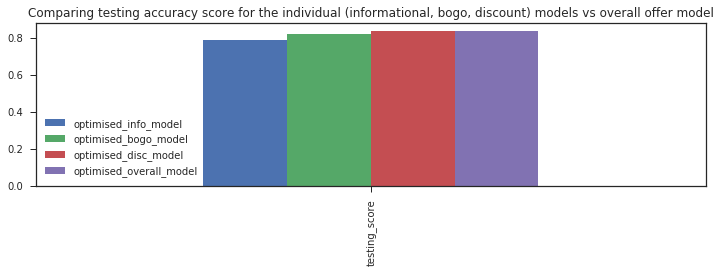

In [148]:

optimised_results_df_combined.loc[['testing_score'], ['optimised_info_model', 
                                                      'optimised_bogo_model', 
                                                      'optimised_disc_model', 
                                                      'optimised_overall_model']].plot.bar(figsize=(12,3))
plt.title('Comparing testing accuracy score for the individual (informational, bogo, discount) models vs overall offer model')
plt.legend(loc=3)
plt.show()

Given that all 4 models are quite on par from a testing accuracy standpoint, we have the option of using the models for individual offer types or using the overall offer type model. 

<a id='6.03' ></a>
## 6.03: Feature importance for each optimised model
We will look at the optimum model for each offer type (informational, bogo, discount, overall) and analyse the top features that drive the predictive power of each model. 

<a id='6.03.1' ></a>
### 6.03.1: Feature importance - 'informational' offer model
Observations:
- The prominent feature is 'amount_valid' which is the amount spent by customers within the offer period. This makes sense as the more a customer spends, the more likely they will complete the offer
- Customers with higher 'income', has higher 'days_as_members', and 'age' are more likely to result in an effective offer. This could be as they have greater disposable income to spend on a non-price-reducing offer and perhaps being older means they have the means to do so. Having been members of Starbucks for longer also shows loyalty, which in turn mean they are more likely to act on the offer.
- The longer the 'offer_duration_hours' the better, as it gives customers more chance to act effectively on the offers
- It seems best to focus on 'web' and 'social' channels to deliver this offer type
- It also seems that sending customers more offers of different types (higher 'offer_frequency_per_cust') and of the same type (higher 'dist_offer_id_type') helps with generating effective offers


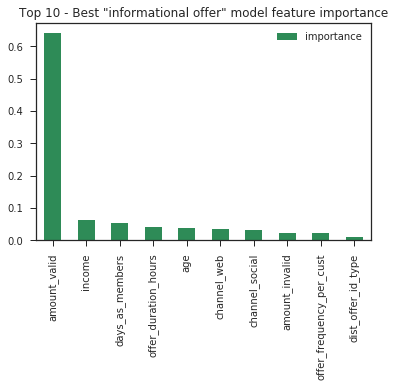

In [138]:
# Analyse feature importance for 'informational offer' model

features,target = data_prep(merged_base_set_final_info, drop_cols_list)
feature_importances = pd.DataFrame(optimised_model_info.feature_importances_,
                                   index = features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10).plot.bar(color='seagreen')
plt.title('Top 10 - Best "informational offer" model feature importance')
plt.show()

<a id='6.03.2' ></a>
### 6.03.2: Feature importance - 'bogo' offer model
Observations on features that help predict an 'effective offer' (an offer that is received -> viewed -> transacted -> completed by customer):

- The prominent feature is 'amount_valid' which is the amount spent by customers within the offer period. This makes sense as the more a customer spends, the more likely they will complete the offer. This is the main feature for all offer models.
- Customers with higher 'income', has higher 'days_as_members', and 'age' are more likely to result in an effective offer. This could be as they have greater disposable income to spend on a non-price-reducing offer and perhaps being older means they have the means to do so. Having been members of Starbucks for longer also shows loyalty, which in turn mean they are more likely to act on the offer.
- The longer the 'offer_duration_hours' the better, as it gives customers more chance to act effectively on the offers
- It seems best to focus on the 'social' channel to deliver this offer type
- It also seems that sending customers more offers of different types (higher 'offer_frequency_per_cust') only helps with generating effective offers
- 'offer_difficulty' and 'offer_reward' also play a part here

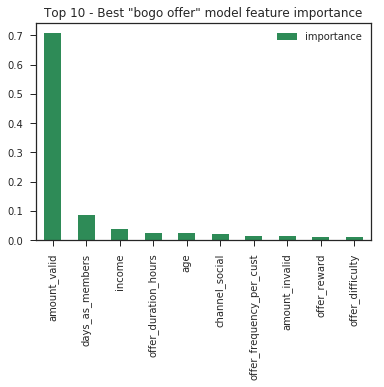

In [139]:
# Analyse feature importance for 'bogo offer' model

features,target = data_prep(merged_base_set_final_bogo, drop_cols_list)
feature_importances = pd.DataFrame(optimised_model_bogo.feature_importances_,
                                   index = features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10).plot.bar(color='seagreen')
plt.title('Top 10 - Best "bogo offer" model feature importance')
plt.show()

<a id='6.03.3' ></a>
### 6.03.3: Feature importance - 'discount' offer model
Observations on features that help predict an 'effective offer' (an offer that is received -> viewed -> transacted -> completed by customer):

- The prominent feature is 'amount_valid' which is the amount spent by customers within the offer period. This makes sense as the more a customer spends, the more likely they will complete the offer. This is the main feature for all offer models.
- It seems best to focus on the 'social' channel to deliver this offer type, followed by the 'mobile' channel
- Customers with higher 'income', has higher 'days_as_members', and 'age' are more likely to result in an effective offer. This could be as they have greater disposable income to spend on a non-price-reducing offer and perhaps being older means they have the means to do so. Having been members of Starbucks for longer also shows loyalty, which in turn mean they are more likely to act on the offer.
- 'offer_difficulty' and 'offer_reward' also play a part here
- It also seems that sending customers more offers of the same type (higher 'dist_offer_id_type') only helps with generating effective offers
- The longer the 'offer_duration_hours' the better, as it gives customers more chance to act effectively on the offers

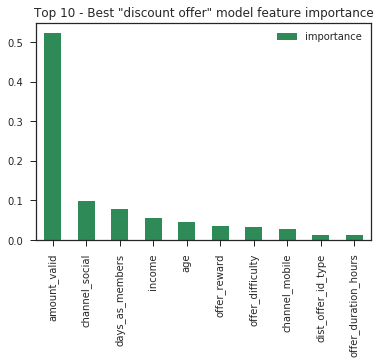

In [140]:
# Analyse feature importance for 'discount offer' model

features,target = data_prep(merged_base_set_final_disc, drop_cols_list)
feature_importances = pd.DataFrame(optimised_model_disc.feature_importances_,
                                   index = features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10).plot.bar(color='seagreen')
plt.title('Top 10 - Best "discount offer" model feature importance')
plt.show()

<a id='6.03.4' ></a>
### 6.03.4: Feature importance - 'overall' offer model
Observations on features that help predict an 'effective offer' (an offer that is received -> viewed -> transacted -> completed by customer):

- The prominent feature is 'amount_valid' which is the amount spent by customers within the offer period. This makes sense as the more a customer spends, the more likely they will complete the offer. This is the main feature for all offer models.
- It seems best to focus on the 'social' channel to deliver this offer type, followed by the 'mobile' and 'email' channels
- Customers with higher 'income', has higher 'days_as_members', and 'age' are more likely to result in an effective offer. This could be as they have greater disposable income to spend on a non-price-reducing offer and perhaps being older means they have the means to do so. Having been members of Starbucks for longer also shows loyalty, which in turn mean they are more likely to act on the offer.
- The longer the 'offer_duration_hours' the better, as it gives customers more chance to act effectively on the offers
- 'offer_reward' also play a part here

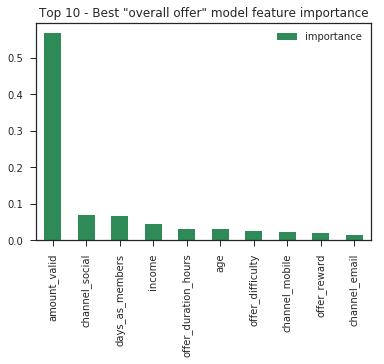

In [141]:
# Analyse feature importance for 'overall offer' model

features,target = data_prep(merged_base_set_final, drop_cols_list)
feature_importances = pd.DataFrame(optimised_model_all.feature_importances_,
                                   index = features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10).plot.bar(color='seagreen')
plt.title('Top 10 - Best "overall offer" model feature importance')
plt.show()

<a id='7' ></a>
# 7: Conclusion
Overall, this was a great project which provides plenty of opportunity to apply key skills such as data and feature engineering, and modelling.

Let's circle back to the business questions that were formed to guide our project and see how well we have covered them.

Then, let us look at potential future improvements.

<a id='7.01' ></a>
## 7.01: Reflection - Answering the business questions
Let's see if we have been able to answer the business questions.

### Question 1: For each type of offer, what features (offer characteristics, user characteristics) increases its effectiveness?
Each type of offer has varying features that drive the effectiveness of an offer. We explore the top predictive features for each offer in section 6.

- In general, the key predictive features are 'amount_valid' which is the amount spent by customers within the offer period. This makes sense as the more a customer spends, the more likely they will complete the offer. This is the main feature for all offer models.
- Other predictive features are:
    - Customer features where those with higher 'income', has higher 'days_as_members', and 'age' are more likely to result in an effective offer. This could be as they have greater disposable income to spend on a non-price-reducing offer and perhaps being older means they have the means to do so. Having been members of Starbucks for longer also shows loyalty, which in turn mean they are more likely to act on the offer.
    - Offer features such as 'offer_difficulty', 'offer_reward'. The longer the 'offer_duration_hours' the better, as it gives customers more chance to act effectively on the offers. It also seems that sending customers more offers of different types (higher 'offer_frequency_per_cust') and of the same type (higher 'dist_offer_id_type') helps with generating effective offers.
    - Channel features where effective channels are 'social', 'mobile', 'email' - in order of effectiveness.

### Question 2: For each type of offer, can we predict the likelihood of an app user responding to the offer?
We have been able to create optimised models that will enable us to target users with an offer they are most likely to respond to. Separate models have been created for each offer type.

- The 'overall' and 'discount' offer type models have the highest accuracy at ~84%, followed by 'bogo' with ~82% and 'informational' with ~79%.
- These are relatively high accuracy scores and should enable us to confidently target customers with offer types that they are most likely to respond positively to.
- Given that all 4 models are quite on par from a testing accuracy standpoint, we have the option of using the models for individual offer types or using the overall offer type model. 

<a id='7.02' ></a>
## 7.02: Potential future improvements
There are multiple things that we can explore further in the future as follows:
- Performing a deep dive on the customer groupings that were created to better understand the demographics of customers we are sending offers to.
- Further optimising the offer models and using more bespoke models.